In [213]:
import pandas as pd
import scipy.stats as ss
import numpy as np
import seaborn as sbs
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef,roc_auc_score,f1_score,RocCurveDisplay,roc_curve,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from sklearn.inspection import permutation_importance

In [2]:
df=pd.read_csv('features_ptbxl_CQQ.csv',sep=',')

In [3]:
dfn=df[df.NORM==1]
dfd=df[df.NORM!=1]

In [4]:
def mannwhitney_z(x1,x2):
    U1, p = ss.mannwhitneyu(x1, x2)
    nx, ny = len(x1), len(x2)
    U2=nx*ny-U1
    u=min(U1,U2)
    z=(U1+.5-((U1+U2)/2))/(np.sqrt(nx*ny*(nx+ny+1)/12))
    return(U1,U2,p,z)

## Standard quantifiers

In [5]:
mannwhitney_z(dfn['P(f1)'],dfd['P(f1)'])

(49532465.0, 67347025.0, 2.9875140783617807e-83, -19.33028701487385)

In [6]:
mannwhitney_z(dfn['higuchi'],dfd['higuchi'])

(50530169.0, 66349321.0, 4.846277230446796e-66, -17.16510238404603)

<Axes: >

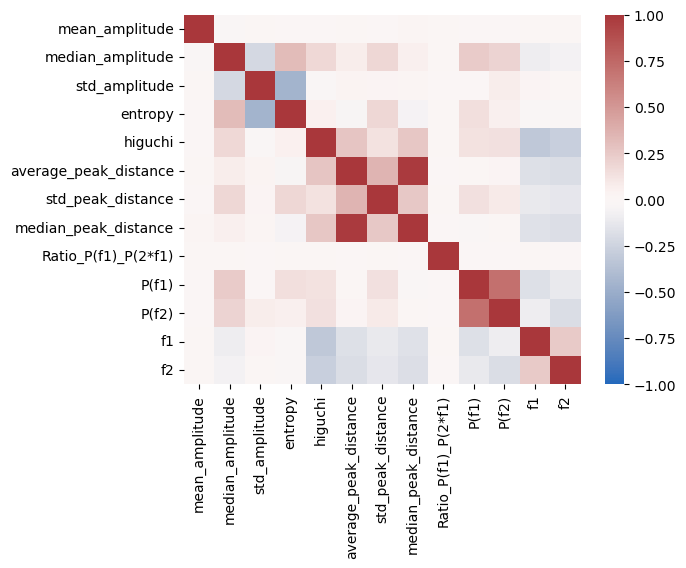

In [7]:
corrdf=df[['mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2']]
corr = corrdf.corr()
sbs.color_palette("vlag", as_cmap=True)
# plot the heatmap
sbs.heatmap(corr, cmap='vlag',vmin=-1, vmax=1)

<Axes: >

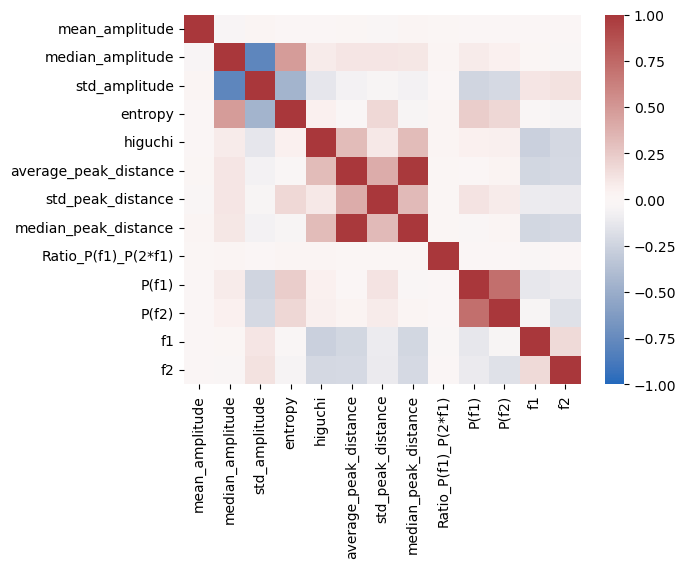

In [8]:
corrdfn=dfn[['mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2']]
corrn = corrdfn.corr()
sbs.color_palette("vlag", as_cmap=True)
# plot the heatmap
sbs.heatmap(corrn, cmap='vlag',vmin=-1, vmax=1)

<Axes: >

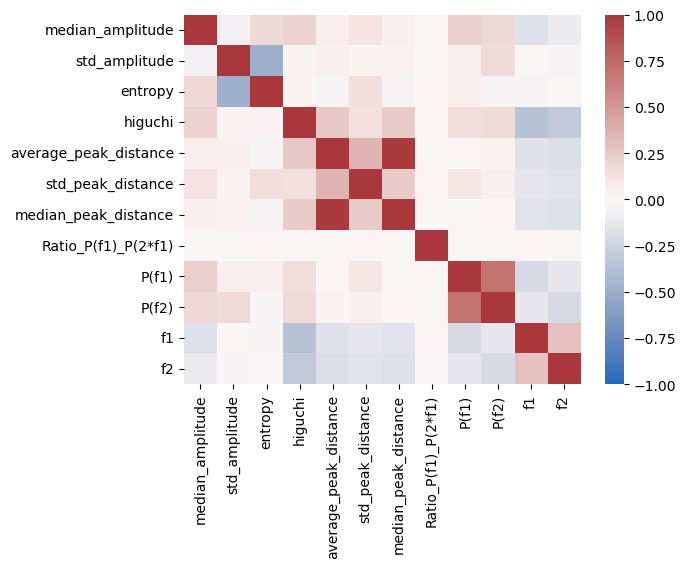

In [35]:
corrdfd=dfd[['median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2']]
corrd = corrdfd.corr()
sbs.color_palette("vlag", as_cmap=True)
# plot the heatmap
sbs.heatmap(corrd, cmap='vlag',vmin=-1, vmax=1)

In [36]:
np.mean(np.mean(corr)),np.mean(np.mean(corrn)),np.mean(np.mean(corrd))

/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, ou

(0.10521269553313115, 0.09259358279562252, 0.11072669389759965)

In [37]:
np.std(np.std(corr)),np.std(np.std(corrn)),np.std(np.std(corrd))

(0.03205288580710766, 0.041512625961514324, 0.031414889917460276)

In [38]:
df.head()

,id,mean_amplitude,median_amplitude,std_amplitude,entropy,higuchi,average_peak_distance,std_peak_distance,median_peak_distance,Ratio_P(f1)_P(2*f1),P(f1),P(f2),f1,f2,NORM
0,1,-1.077007e-08,-0.026633,0.076493,1.411599,0.663160,0.939000,0.018138,0.935,3.705312,67021.611063,36600.929437,3.2,2.1,1
1,2,7.315423e-07,-0.033524,0.175579,0.801715,0.735689,1.277143,0.071056,1.300,6.753723,46176.472267,10768.045445,0.8,2.5,1
2,3,4.968432e-08,-0.020845,0.097746,1.232485,0.694529,0.944000,0.021541,0.940,1.856574,28907.523855,28463.788023,3.2,1.1,1
3,4,-8.874212e-09,-0.061403,0.264302,1.033738,0.642166,0.799167,0.041725,0.790,6.339199,40571.261846,15018.455978,1.2,3.7,1
4,5,9.933890e-07,-0.050892,0.187635,0.732804,0.702753,0.905000,0.049041,0.900,3.235096,30630.265496,26445.641487,1.1,3.3,1


In [39]:
dfptb=pd.read_csv('ptbxl_database.csv',sep=',')

In [40]:
dfptb.head()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


In [41]:
dfm=dfptb[['ecg_id','strat_fold']]

In [42]:
dfm

,ecg_id,strat_fold
0,1,3
1,2,2
2,3,5
3,4,3
4,5,4
...,...,...
21794,21833,7
21795,21834,4
21796,21835,2
21797,21836,8


In [43]:
dfm=dfm.merge(df, left_on='ecg_id', right_on='id')

In [44]:
dfm.head()

,ecg_id,strat_fold,id,mean_amplitude,median_amplitude,std_amplitude,entropy,higuchi,average_peak_distance,std_peak_distance,median_peak_distance,Ratio_P(f1)_P(2*f1),P(f1),P(f2),f1,f2,NORM
0,1,3,1,-1.077007e-08,-0.026633,0.076493,1.411599,0.663160,0.939000,0.018138,0.935,3.705312,67021.611063,36600.929437,3.2,2.1,1
1,2,2,2,7.315423e-07,-0.033524,0.175579,0.801715,0.735689,1.277143,0.071056,1.300,6.753723,46176.472267,10768.045445,0.8,2.5,1
2,3,5,3,4.968432e-08,-0.020845,0.097746,1.232485,0.694529,0.944000,0.021541,0.940,1.856574,28907.523855,28463.788023,3.2,1.1,1
3,4,3,4,-8.874212e-09,-0.061403,0.264302,1.033738,0.642166,0.799167,0.041725,0.790,6.339199,40571.261846,15018.455978,1.2,3.7,1
4,5,4,5,9.933890e-07,-0.050892,0.187635,0.732804,0.702753,0.905000,0.049041,0.900,3.235096,30630.265496,26445.641487,1.1,3.3,1


In [45]:
np.min(dfm.strat_fold)

1

In [46]:
train_fold=[1,2,3,4,5,6,7]
dfm_train=dfm.loc[dfm['strat_fold'].isin(train_fold)]

In [47]:
test_fold=[8,9,10]
dfm_test=dfm.loc[dfm['strat_fold'].isin(test_fold)]

In [48]:
clf0 = MLPClassifier(random_state=1,max_iter=200,activation='relu', alpha=1.5,hidden_layer_sizes=(125,))

In [49]:
dfm_train=dfm_train.dropna()
dfm_test=dfm_test.dropna()

In [50]:
X_train0=dfm_train[['mean_amplitude','median_amplitude','std_amplitude','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2']]
X_test0=dfm_test[['mean_amplitude','median_amplitude','std_amplitude','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2']]
Y_train0=np.array(dfm_train['NORM'])
Y_test0=np.array(dfm_test['NORM'])

In [51]:
scaler=StandardScaler()
scaler.fit(X_train0)
X_train0=scaler.transform(X_train0)
X_test0=scaler.transform(X_test0)

In [52]:
clf0.fit(X_train0, Y_train0)

MLPClassifier(alpha=1.5, hidden_layer_sizes=(125,), random_state=1)

In [53]:
Y_pred0=clf0.predict(X_test0)
print(confusion_matrix(Y_test0,Y_pred0))
print(classification_report(Y_test0,Y_pred0))
print(matthews_corrcoef(Y_test0,Y_pred0))

[[2855  810]
 [ 626 2218]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3665
           1       0.73      0.78      0.76      2844

    accuracy                           0.78      6509
   macro avg       0.78      0.78      0.78      6509
weighted avg       0.78      0.78      0.78      6509

0.5557619379179632


In [54]:
# predict probabilities
lr_probs0 = clf0.predict_proba(X_test0)
lr_probs0=[i[1] for i in lr_probs0]
# generate a no skill prediction (majority class)
ns_probs0 = [0 for _ in range(len(Y_test0))]
# calculate scores
ns_auc0 = roc_auc_score(Y_test0, ns_probs0)
lr_auc0 = roc_auc_score(Y_test0, lr_probs0)

In [55]:
print(ns_auc0,lr_auc0)

0.5 0.8568899749214737


In [229]:
dfm=dfm.dropna()
cr=[]
mcc=[]
aucl=[]
for test in range(1,11):
    dfm_test=dfm.loc[dfm['strat_fold']==test]
    dfm_train=dfm.loc[dfm['strat_fold']!=test]
    #print('train: %s, test: %s' % (data[train], data[test]))
    X_train0=dfm_train[['mean_amplitude','median_amplitude','std_amplitude','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2']]
    X_test0=dfm_test[['mean_amplitude','median_amplitude','std_amplitude','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2']]
    Y_train0=np.array(dfm_train['NORM'])
    Y_test0=np.array(dfm_test['NORM'])
    scaler=StandardScaler()
    scaler.fit(X_train0)
    X_train0=scaler.transform(X_train0)
    X_test0=scaler.transform(X_test0)
    clf0 = MLPClassifier(random_state=42,max_iter=250,activation='relu', alpha=1.5,hidden_layer_sizes=(200,100,), solver='adam', learning_rate='adaptive')
    clf0.fit(X_train0, Y_train0)
    Y_pred0=clf0.predict(X_test0)
    #cm.append(confusion_matrix(Y_testmd,Y_predmd)
    cr.append(classification_report(Y_test0,Y_pred0, output_dict=True))
    mcc.append(matthews_corrcoef(Y_test0,Y_pred0))
    lr_probs0 = clf0.predict_proba(X_test0)
    lr_probs0=[i[1] for i in lr_probs0]
   
    # calculate scores
    
    aucl.append(roc_auc_score(Y_test0, lr_probs0))
    print(test)

1
2
3
4
5
6
7
8
9
10


In [230]:
avg=[cr[i]['accuracy'] for i in range(0,10)]
print(np.mean(avg))
print(np.mean(aucl))
print(np.mean(mcc))

0.7794779883148537
0.8584555004983073
0.5536337827000678


## Complexity quantifiers

In [58]:
dfrp=pd.read_csv('rplist_ptb.dat')
dfrp.head()

,id,det,lam,dent,vent,tt,lbyd
0,1,0.626518,0.769287,1.193600,1.655509,3.512687,1.227876
1,2,0.890991,0.937866,2.368800,2.663507,6.997131,1.052610
2,3,0.778014,0.870296,1.764431,2.127348,4.733403,1.118612
3,4,0.861116,0.921894,2.195355,2.444869,5.916531,1.070581
4,5,0.835689,0.910575,2.313587,2.256532,5.107084,1.089609


In [59]:
dfm2=dfm.merge(dfrp, left_on='ecg_id', right_on='id')

In [60]:
df_mse=pd.read_csv('mse_ptb_v1.dat')
dfm2=dfm2.merge(df_mse, left_on='ecg_id', right_on='id')

In [61]:
train_fold=[1,2,3,4,5,6,7]
dfm2_train=dfm2.loc[dfm2['strat_fold'].isin(train_fold)]
test_fold=[8,9,10]
dfm2_test=dfm2.loc[dfm2['strat_fold'].isin(test_fold)]

In [62]:
#X_train1=dfm_train[['mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2']]
#X_test1=dfm_test[['mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2']]
#Y_train1=np.array(dfm_train['NORM'])
#Y_test1=np.array(dfm_test['NORM'])
dfm2_train=dfm2_train.dropna()
dfm2_test=dfm2_test.dropna()

In [63]:
X_train1=dfm2_train[['mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse', 'det','lam','dent','vent','tt','lbyd','PermEnt','LZV']]
X_test1=dfm2_test[['mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse','det','lam','dent','vent','tt','lbyd','PermEnt','LZV']]
Y_train1=np.array(dfm2_train['NORM'])
Y_test1=np.array(dfm2_test['NORM'])

In [64]:
scaler=StandardScaler()
scaler.fit(X_train1)
X_train1=scaler.transform(X_train1)
X_test1=scaler.transform(X_test1)

In [65]:
clf1 = MLPClassifier(random_state=1,max_iter=200,activation='relu', alpha=1.5,hidden_layer_sizes=(125,))

In [66]:
clf1.fit(X_train1, Y_train1)

MLPClassifier(alpha=1.5, hidden_layer_sizes=(125,), random_state=1)

In [67]:
Y_pred1=clf1.predict(X_test1)
print(confusion_matrix(Y_test1,Y_pred1))
print(classification_report(Y_test1,Y_pred1))
print(matthews_corrcoef(Y_test1,Y_pred1))

[[2858  807]
 [ 588 2256]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      3665
           1       0.74      0.79      0.76      2844

    accuracy                           0.79      6509
   macro avg       0.78      0.79      0.78      6509
weighted avg       0.79      0.79      0.79      6509

0.5694678255430113


In [68]:
# predict probabilities
lr_probs1 = clf1.predict_proba(X_test1)
lr_probs1=[i[1] for i in lr_probs1]
# generate a no skill prediction (majority class)
ns_probs1 = [0 for _ in range(len(Y_test1))]
# calculate scores
ns_auc1 = roc_auc_score(Y_test1, ns_probs1)
lr_auc1 = roc_auc_score(Y_test1, lr_probs1)

In [69]:
print(ns_auc1,lr_auc1)

0.5 0.8693105611871911


In [231]:
dfm2=dfm2.dropna()
cr=[]
mcc=[]
aucl=[]
for test in range(1,11):
    dfm2_test=dfm2.loc[dfm2['strat_fold']==test]
    dfm2_train=dfm2.loc[dfm2['strat_fold']!=test]
    #print('train: %s, test: %s' % (data[train], data[test]))
    X_train1=dfm2_train[['mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse', 'det','lam','dent','vent','tt','lbyd','PermEnt','LZV']]
    X_test1=dfm2_test[['mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse', 'det','lam','dent','vent','tt','lbyd','PermEnt','LZV']]
    Y_train1=np.array(dfm2_train['NORM'])
    Y_test1=np.array(dfm2_test['NORM'])
    scaler=StandardScaler()
    scaler.fit(X_train1)
    X_train1=scaler.transform(X_train1)
    X_test1=scaler.transform(X_test1)
    clf1 = MLPClassifier(random_state=42,max_iter=250,activation='relu', alpha=1.5,hidden_layer_sizes=(200,100), solver='adam', learning_rate='adaptive')
    clf1.fit(X_train1, Y_train1)
    Y_pred1=clf1.predict(X_test1)
    #cm.append(confusion_matrix(Y_testmd,Y_predmd)
    cr.append(classification_report(Y_test1,Y_pred1, output_dict=True))
    mcc.append(matthews_corrcoef(Y_test1,Y_pred1))
    lr_probs1 = clf1.predict_proba(X_test1)
    lr_probs1=[i[1] for i in lr_probs1]
   
    # calculate scores
    
    aucl.append(roc_auc_score(Y_test1, lr_probs1))
    print(test)

1
2
3
4
5
6
7
8
9
10


In [232]:
avg=[cr[i]['accuracy'] for i in range(0,10)]
print(np.mean(avg))
print(np.mean(aucl))
print(np.mean(mcc))

0.7934743079653308
0.8736100584659987
0.5819348229884738


In [72]:
Y_pred1

array([1, 0, 1, ..., 0, 0, 0])

## Cross Time Series Metrics

In [73]:
dfcr=pd.read_csv('CrossTimeSeries.dat')
dfcr.head()

,id,MI-II-AVL,MI-II-V2,MI-V2-AVL,rho-II-AVL,rho-II-V2,rho-V2-AVL
0,1,1.659178,1.622680,1.199449,0.609524,0.340423,0.226980
1,2,1.918023,1.245270,1.613528,-0.127718,0.027067,0.648935
2,3,1.585033,1.232038,1.282274,0.247079,0.126077,0.495225
3,4,1.912928,1.855199,1.586916,-0.279600,0.239528,0.616899
4,5,1.426132,1.519694,1.233062,-0.445967,0.263506,0.230568


In [74]:
dfm3=dfm2.merge(dfcr, left_on='ecg_id', right_on='id')

/tmp/ipykernel_46988/1242010483.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'id_x'} in the result is deprecated and will raise a MergeError in a future version.
  dfm3=dfm2.merge(dfcr, left_on='ecg_id', right_on='id')


In [75]:
train_fold=[1,2,3,4,5,6,7]
dfm3_train=dfm3.loc[dfm3['strat_fold'].isin(train_fold)]
test_fold=[8,9,10]
dfm3_test=dfm3.loc[dfm3['strat_fold'].isin(test_fold)]

In [76]:
dfm3_train=dfm3_train.dropna()
dfm3_test=dfm3_test.dropna()

In [77]:
X_train2=dfm3_train[['mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse','MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL', 'det','lam','dent','vent','tt','lbyd','PermEnt','LZV']]
X_test2=dfm3_test[['mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse','MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL','det','lam','dent','vent','tt','lbyd','PermEnt','LZV']]
Y_train2=np.array(dfm3_train['NORM'])
Y_test2=np.array(dfm3_test['NORM'])
#X_train2=dfm2_train[['mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL']]
#X_test2=dfm2_test[['mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL']]
#Y_train2=np.array(dfm2_train['NORM'])
#Y_test2=np.array(dfm2_test['NORM'])

In [78]:
len(['mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse','MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL', 'det','lam','dent','vent','tt','lbyd'])

26

In [79]:
scaler=StandardScaler()
scaler.fit(X_train2)
X_train2=scaler.transform(X_train2)
X_test2=scaler.transform(X_test2)

In [80]:
clf2 = MLPClassifier(random_state=1,max_iter=200,activation='relu', alpha=1.5,hidden_layer_sizes=(125,))

In [81]:
clf2.fit(X_train2, Y_train2)

MLPClassifier(alpha=1.5, hidden_layer_sizes=(125,), random_state=1)

In [82]:
Y_pred2=clf2.predict(X_test2)
print(confusion_matrix(Y_test2,Y_pred2))
print(classification_report(Y_test2,Y_pred2))
print(matthews_corrcoef(Y_test2,Y_pred2))

[[2994  671]
 [ 487 2357]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      3665
           1       0.78      0.83      0.80      2844

    accuracy                           0.82      6509
   macro avg       0.82      0.82      0.82      6509
weighted avg       0.82      0.82      0.82      6509

0.6420791369595995


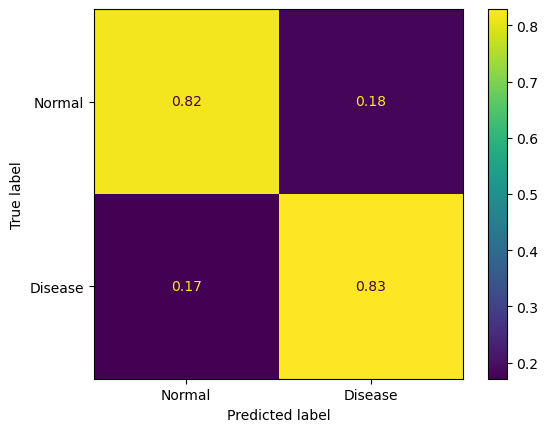

In [83]:
confusion_matrix2 = metrics.confusion_matrix(Y_test2,Y_pred2, normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = ['Normal', 'Disease'])
cm_display.plot()
plt.show() 

In [84]:
# predict probabilities
lr_probs2 = clf2.predict_proba(X_test2)
lr_probs2=[i[1] for i in lr_probs2]
# generate a no skill prediction (majority class)
ns_probs2 = [0 for _ in range(len(Y_test2))]
# calculate scores
ns_auc2 = roc_auc_score(Y_test2, ns_probs2)
lr_auc2 = roc_auc_score(Y_test2, lr_probs2)

In [85]:
print(ns_auc2,lr_auc2)

0.5 0.9011771748953782


In [86]:
accuracy = accuracy_score(Y_test2, Y_pred2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.21%


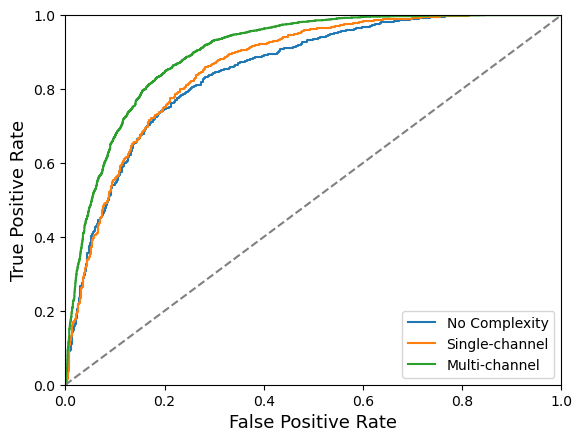

In [87]:
fpr, tpr, thresholds = roc_curve(Y_test0, lr_probs0)
plt.plot(fpr, tpr, label="No Complexity") 
fpr, tpr, thresholds = roc_curve(Y_test1, lr_probs1)
plt.plot(fpr, tpr, label="Single-channel") 
fpr, tpr, thresholds = roc_curve(Y_test2, lr_probs2)
plt.plot(fpr, tpr, label="Multi-channel") 
plt.legend(loc="lower right")
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate', size=13)
plt.ylabel('True Positive Rate', size=13)
plt.axline((0, 0), linestyle='--', color='gray',slope=1)

In [233]:
dfm3=dfm3.dropna()
cr=[]
mcc=[]
aucl=[]
for test in range(1,11):
    dfm3_test=dfm3.loc[dfm3['strat_fold']==test]
    dfm3_train=dfm3.loc[dfm3['strat_fold']!=test]
    #print('train: %s, test: %s' % (data[train], data[test]))
    X_train2=dfm3_train[['mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse','MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL', 'det','lam','dent','vent','tt','lbyd','PermEnt','LZV']]
    X_test2=dfm3_test[['mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse','MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL', 'det','lam','dent','vent','tt','lbyd','PermEnt','LZV']]
    Y_train2=np.array(dfm3_train['NORM'])
    Y_test2=np.array(dfm3_test['NORM'])
    scaler=StandardScaler()
    scaler.fit(X_train2)
    X_train2=scaler.transform(X_train2)
    X_test2=scaler.transform(X_test2)
    clf2 = MLPClassifier(random_state=42,max_iter=250,activation='relu', alpha=1.5,hidden_layer_sizes=(200,100), solver='adam', learning_rate='adaptive')
    clf2.fit(X_train2, Y_train2)
    Y_pred2=clf2.predict(X_test2)
    #cm.append(confusion_matrix(Y_testmd,Y_predmd)
    cr.append(classification_report(Y_test2,Y_pred2, output_dict=True))
    mcc.append(matthews_corrcoef(Y_test2,Y_pred2))
    lr_probs2 = clf2.predict_proba(X_test2)
    lr_probs2=[i[1] for i in lr_probs2]
   
    # calculate scores
    
    aucl.append(roc_auc_score(Y_test2, lr_probs2))
    print(test)

1
2
3
4
5
6
7
8
9
10


In [234]:
avg=[cr[i]['accuracy'] for i in range(0,10)]
print(np.mean(avg))
print(np.mean(aucl))
print(np.mean(mcc))

0.8258689888102989
0.9053183645573946
0.6498942853890508


## Age Sex Weight

In [90]:
df_md=dfptb[['ecg_id', 'age', 'sex', 'weight']]#Metadata

In [91]:
dfm_wmd=dfm3.merge(df_md, left_on='ecg_id', right_on='ecg_id')
dfm_wmd=dfm_wmd.dropna()

In [235]:
cr=[]
mcc=[]
aucl=[]
for test in range(1,11):
    dfmwmd_test=dfm_wmd.loc[dfm_wmd['strat_fold']==test]
    dfmwmd_train=dfm_wmd.loc[dfm_wmd['strat_fold']!=test]
    #print('train: %s, test: %s' % (data[train], data[test]))
    X_trainmd=dfmwmd_train[['age', 'sex', 'weight','mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse','MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL', 'det','lam','dent','vent','tt','lbyd','PermEnt','LZV']]
    X_testmd=dfmwmd_test[['age', 'sex', 'weight','mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse','MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL','det','lam','dent','vent','tt','lbyd','PermEnt','LZV']]
    Y_trainmd=np.array(dfmwmd_train['NORM'])
    Y_testmd=np.array(dfmwmd_test['NORM'])
    scaler=StandardScaler()
    scaler.fit(X_trainmd)
    X_trainmd=scaler.transform(X_trainmd)
    X_testmd=scaler.transform(X_testmd)
    clfmd = MLPClassifier(random_state=42,max_iter=250,activation='relu', alpha=1.5,hidden_layer_sizes=(200,100,), solver='adam', learning_rate='adaptive')
    clfmd.fit(X_trainmd, Y_trainmd)
    Y_predmd=clfmd.predict(X_testmd)
    #cm.append(confusion_matrix(Y_testmd,Y_predmd)
    cr.append(classification_report(Y_testmd,Y_predmd, output_dict=True))
    mcc.append(matthews_corrcoef(Y_testmd,Y_predmd))
    lr_probsmd = clfmd.predict_proba(X_testmd)
    lr_probsmd=[i[1] for i in lr_probsmd]
   
    # calculate scores
    
    aucl.append(roc_auc_score(Y_testmd, lr_probsmd))
    print(test)

1
2
3
4
5
6
7
8
9
10


In [236]:
avg=[cr[i]['accuracy'] for i in range(0,10)]
print(np.mean(avg))
print(np.mean(aucl))
print(np.mean(mcc))

0.8381558384835233
0.9105033241394789
0.6712274534789889


In [94]:
n1=['age', 'sex', 'weight','mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse','MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL', 'det','lam','dent','vent','tt','lbyd','PermEnt','LZV']

In [267]:
len(n1)

31

In [95]:
r = permutation_importance(clfmd, X_testmd, Y_testmd,n_repeats=100,random_state=0)

In [96]:
for i in r.importances_mean.argsort()[::-1]:

    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:

        print(f"{n1[i]:<8}"

              f"{r.importances_mean[i]:.3f}"

              f" +/- {r.importances_std[i]:.3f}")


median_amplitude0.132 +/- 0.012
std_amplitude0.038 +/- 0.006
rho-V2-AVL0.026 +/- 0.007
age     0.021 +/- 0.006
rho-II-V20.018 +/- 0.006
MI-II-V20.010 +/- 0.005
LZV     0.007 +/- 0.003
std_peak_distance0.007 +/- 0.003


## Best Threshold

In [97]:
# predict probabilities
yhat = clfmd.predict_proba(X_trainmd)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(Y_trainmd, yhat)
# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
y_predb = (clfmd.predict_proba(X_testmd)[:,1] >= best_thresh).astype(bool)

Best Threshold=0.529897


In [98]:
print(confusion_matrix(Y_testmd,y_predb))
print(classification_report(Y_testmd,y_predb))
print(matthews_corrcoef(Y_testmd,y_predb))


[[341 121]
 [ 70 537]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       462
           1       0.82      0.88      0.85       607

    accuracy                           0.82      1069
   macro avg       0.82      0.81      0.82      1069
weighted avg       0.82      0.82      0.82      1069

0.634179119798576


## Logistic Regression

In [216]:
lr0 = LogisticRegression(random_state=42).fit(X_train0, Y_train0)
Y_pred_lr0=lr0.predict(X_test0)

In [217]:
print('Standard quantifiers')
accuracy = accuracy_score(Y_test0, Y_pred_lr0)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(Y_test0, Y_pred_lr0))
print(classification_report(Y_test0, Y_pred_lr0))
print(matthews_corrcoef(Y_test0, Y_pred_lr0))

Standard quantifiers
Accuracy: 75.64%
[[943 275]
 [256 706]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1218
           1       0.72      0.73      0.73       962

    accuracy                           0.76      2180
   macro avg       0.75      0.75      0.75      2180
weighted avg       0.76      0.76      0.76      2180

0.5071342221287031


In [218]:
print('Standard quantifiers')
Y_proba_lr0 = lr0.predict_proba(X_test0)[:,1]
print(roc_auc_score(Y_test0,Y_proba_lr0),'AUC')

Standard quantifiers
0.8305451150278736 AUC


In [219]:
lr1 = LogisticRegression(random_state=42).fit(X_train1, Y_train1)
Y_pred_lr1=lr1.predict(X_test1)

In [220]:
print('Complex quantifiers')
accuracy = accuracy_score(Y_test1, Y_pred_lr1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(Y_test1, Y_pred_lr1))
print(classification_report(Y_test1, Y_pred_lr1))
print(matthews_corrcoef(Y_test1, Y_pred_lr1))

Complex quantifiers
Accuracy: 76.65%
[[941 277]
 [232 730]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1218
           1       0.72      0.76      0.74       962

    accuracy                           0.77      2180
   macro avg       0.76      0.77      0.76      2180
weighted avg       0.77      0.77      0.77      2180

0.5292735983291035


In [228]:
print('Complex quantifiers')
Y_proba_lr1 = lr1.predict_proba(X_test1)[:,1]
print(roc_auc_score(Y_test1,Y_proba_lr1),'AUC')

Complex quantifiers
0.8424106182726873 AUC


In [221]:
lr2 = LogisticRegression(random_state=42).fit(X_train2, Y_train2)
Y_pred_lr2=lr2.predict(X_test2)

In [222]:
print('Cross quantifiers')
accuracy = accuracy_score(Y_test2, Y_pred_lr2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(Y_test2, Y_pred_lr2))
print(classification_report(Y_test2, Y_pred_lr2))
print(matthews_corrcoef(Y_test2, Y_pred_lr2))

Complex quantifiers
Accuracy: 79.86%
[[967 251]
 [188 774]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1218
           1       0.76      0.80      0.78       962

    accuracy                           0.80      2180
   macro avg       0.80      0.80      0.80      2180
weighted avg       0.80      0.80      0.80      2180

0.5954168974416636


In [226]:
print('Cross quantifiers')
Y_proba_lr2 = lr2.predict_proba(X_test2)[:,1]
print(roc_auc_score(Y_test2,Y_proba_lr2),'AUC')

Cross quantifiers
0.8785081026460337 AUC


In [223]:
lrmd = LogisticRegression(random_state=42).fit(X_trainmd, Y_trainmd)
Y_pred_lrmd=lrmd.predict(X_testmd)

In [224]:
print('Meta quantifiers')
accuracy = accuracy_score(Y_testmd, Y_pred_lrmd)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(Y_testmd, Y_pred_lrmd))
print(classification_report(Y_testmd, Y_pred_lrmd))
print(matthews_corrcoef(Y_testmd, Y_pred_lrmd))

Meta quantifiers
Accuracy: 80.73%
[[337 125]
 [ 81 526]]
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       462
           1       0.81      0.87      0.84       607

    accuracy                           0.81      1069
   macro avg       0.81      0.80      0.80      1069
weighted avg       0.81      0.81      0.81      1069

0.6050324027822578


In [227]:
print('Meta quantifiers')
Y_proba_lrmd = lrmd.predict_proba(X_testmd)[:,1]
print(roc_auc_score(Y_testmd,Y_proba_lrmd),'AUC')

Meta quantifiers
0.8651982284601725 AUC


## Random Forest

In [237]:
rf0 = RandomForestClassifier(n_estimators = 100, random_state=42)
rf0.fit(X_train0, Y_train0)
Y_pred_rf0=rf0.predict(X_test0)

In [238]:
print('Standard quantifiers')
accuracy = accuracy_score(Y_test0, Y_pred_rf0)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(Y_test0, Y_pred_rf0))
print(classification_report(Y_test0, Y_pred_rf0))
print(matthews_corrcoef(Y_test0, Y_pred_rf0))

Standard quantifiers
Accuracy: 77.39%
[[952 266]
 [227 735]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1218
           1       0.73      0.76      0.75       962

    accuracy                           0.77      2180
   macro avg       0.77      0.77      0.77      2180
weighted avg       0.78      0.77      0.77      2180

0.5436825531845485


In [239]:
print('Standard quantifiers')
Y_proba_rf0 = rf0.predict_proba(X_test0)[:,1]
print(roc_auc_score(Y_test0,Y_proba_rf0),'AUC')

Standard quantifiers
0.8454723670240912 AUC


In [240]:
rf1 = RandomForestClassifier(n_estimators = 100, random_state=42)
rf1.fit(X_train1, Y_train1)
Y_pred_rf1=rf1.predict(X_test1)

In [241]:
print('Complex quantifiers')
accuracy = accuracy_score(Y_test1, Y_pred_rf1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(Y_test1, Y_pred_rf1))
print(classification_report(Y_test1, Y_pred_rf1))
print(matthews_corrcoef(Y_test1, Y_pred_rf1))

Complex quantifiers
Accuracy: 77.84%
[[951 267]
 [216 746]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1218
           1       0.74      0.78      0.76       962

    accuracy                           0.78      2180
   macro avg       0.78      0.78      0.78      2180
weighted avg       0.78      0.78      0.78      2180

0.5537907546980747


In [242]:
print('Complex quantifiers')
Y_proba_rf1 = rf1.predict_proba(X_test1)[:,1]
print(roc_auc_score(Y_test1,Y_proba_rf1),'AUC')

Complex quantifiers
0.8550740964534068 AUC


In [243]:
rf2 = RandomForestClassifier(n_estimators = 100, random_state=42)
rf2.fit(X_train2, Y_train2)
Y_pred_rf2=rf2.predict(X_test2)

In [244]:
print('Cross quantifiers')
accuracy = accuracy_score(Y_test2, Y_pred_rf2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(Y_test2, Y_pred_rf2))
print(classification_report(Y_test2, Y_pred_rf2))
print(matthews_corrcoef(Y_test2, Y_pred_rf2))

Cross quantifiers
Accuracy: 81.47%
[[1003  215]
 [ 189  773]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1218
           1       0.78      0.80      0.79       962

    accuracy                           0.81      2180
   macro avg       0.81      0.81      0.81      2180
weighted avg       0.82      0.81      0.81      2180

0.6254214926023923


In [246]:
print('cross quantifiers')
Y_proba_rf2 = rf2.predict_proba(X_test2)[:,1]
print(roc_auc_score(Y_test2,Y_proba_rf2),'AUC')

cross quantifiers
0.8898090492918079 AUC


In [247]:
rfmd = RandomForestClassifier(n_estimators = 100, random_state=42)
rfmd.fit(X_trainmd, Y_trainmd)
Y_pred_rfmd=rfmd.predict(X_testmd)

In [249]:
print('Meta quantifiers')
accuracy = accuracy_score(Y_testmd, Y_pred_rfmd)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(Y_testmd, Y_pred_rfmd))
print(classification_report(Y_testmd, Y_pred_rfmd))
print(matthews_corrcoef(Y_testmd, Y_pred_rfmd))

Meta quantifiers
Accuracy: 81.10%
[[337 125]
 [ 77 530]]
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       462
           1       0.81      0.87      0.84       607

    accuracy                           0.81      1069
   macro avg       0.81      0.80      0.80      1069
weighted avg       0.81      0.81      0.81      1069

0.6127904693945325


In [250]:
print('Meta quantifiers')
Y_proba_rfmd = rfmd.predict_proba(X_testmd)[:,1]
print(roc_auc_score(Y_testmd,Y_proba_rfmd),'AUC')

Meta quantifiers
0.8746977898542972 AUC


### XGBoost

In [99]:
model0 = XGBClassifier(n_estimators=250)
model0.fit(X_train0, Y_train0)
Y_pred_xgb0=model0.predict(X_test0)

In [100]:
print('Standard quantifiers')
accuracy = accuracy_score(Y_test0, Y_pred_xgb0)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(Y_test0, Y_pred_xgb0))
print(classification_report(Y_test0, Y_pred_xgb0))
print(matthews_corrcoef(Y_test0, Y_pred_xgb0))

Standard quantifiers
Accuracy: 76.88%
[[942 276]
 [228 734]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1218
           1       0.73      0.76      0.74       962

    accuracy                           0.77      2180
   macro avg       0.77      0.77      0.77      2180
weighted avg       0.77      0.77      0.77      2180

0.5341220215932705


In [101]:
print('Standard quantifiers')
Y_proba_xgb0 = model0.predict_proba(X_test0)[:,1]
print(roc_auc_score(Y_test0,Y_proba_xgb0),'AUC')

Standard quantifiers
0.839807598428288 AUC


In [102]:
model1 = XGBClassifier(n_estimators=250)
model1.fit(X_train1, Y_train1)
Y_pred_xgb1=model1.predict(X_test1)

In [103]:
print('Complexity quantifiers')
accuracy = accuracy_score(Y_test1, Y_pred_xgb1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(Y_test1, Y_pred_xgb1))
print(classification_report(Y_test1, Y_pred_xgb1))
print(matthews_corrcoef(Y_test1, Y_pred_xgb1))

Complexity quantifiers
Accuracy: 77.11%
[[946 272]
 [227 735]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1218
           1       0.73      0.76      0.75       962

    accuracy                           0.77      2180
   macro avg       0.77      0.77      0.77      2180
weighted avg       0.77      0.77      0.77      2180

0.5385387295901443


In [104]:
print('Complexity quantifiers')
Y_proba_xgb1 = model1.predict_proba(X_test1)[:,1]
print(roc_auc_score(Y_test1,Y_proba_xgb1),'AUC')

Complexity quantifiers
0.8520827572551711 AUC


In [105]:
model2 = XGBClassifier(n_estimators=250)
model2.fit(X_train2, Y_train2)
Y_pred_xgb2=model2.predict(X_test2)

In [106]:
print('Cross time series quantifiers')
accuracy = accuracy_score(Y_test2, Y_pred_xgb2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(Y_test2, Y_pred_xgb2))
print(classification_report(Y_test2, Y_pred_xgb2))
print(matthews_corrcoef(Y_test2, Y_pred_xgb2))

Cross time series quantifiers
Accuracy: 81.01%
[[963 255]
 [159 803]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1218
           1       0.76      0.83      0.80       962

    accuracy                           0.81      2180
   macro avg       0.81      0.81      0.81      2180
weighted avg       0.81      0.81      0.81      2180

0.6213006793311944


In [107]:
print('Cross time series quantifiers')
Y_proba_xgb2 = model2.predict_proba(X_test2)[:,1]
print(roc_auc_score(Y_test2,Y_proba_xgb2),'AUC')

Cross time series quantifiers
0.8857470581608512 AUC


In [108]:
modelmd = XGBClassifier(n_estimators=250)
modelmd.fit(X_trainmd, Y_trainmd)
Y_pred_xgbmd=modelmd.predict(X_testmd)

In [109]:
print('MetaData quantifiers')
accuracy = accuracy_score(Y_testmd, Y_pred_xgbmd)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(Y_testmd, Y_pred_xgbmd))
print(classification_report(Y_testmd, Y_pred_xgbmd))
print(matthews_corrcoef(Y_testmd, Y_pred_xgbmd))

Cross time series quantifiers
Accuracy: 81.20%
[[327 135]
 [ 66 541]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.76       462
           1       0.80      0.89      0.84       607

    accuracy                           0.81      1069
   macro avg       0.82      0.80      0.80      1069
weighted avg       0.81      0.81      0.81      1069

0.6154837198796248


In [110]:
print('Meta data quantifiers')
Y_proba_xgbmd = modelmd.predict_proba(X_testmd)[:,1]
print(roc_auc_score(Y_testmd,Y_proba_xgbmd),'AUC')

Meta data quantifiers
0.8686785482502122 AUC


## Mann Whitney Tests

In [111]:
dfm3=dfm3.dropna()

In [112]:
dfn=dfm3[dfm3.NORM==1]
dfd=dfm3[dfm3.NORM!=1]

In [149]:
pvalue = {}
pvalue['HD']=mannwhitney_z(dfn['higuchi'],dfd['higuchi'])
pvalue['ApEn']=mannwhitney_z(dfn['entropy'],dfd['entropy'])
pvalue['MSE']=mannwhitney_z(dfn['mse'],dfd['mse'])
pvalue['LZC']=mannwhitney_z(dfn['LZV'],dfd['LZV'])
pvalue['PermEn']=mannwhitney_z(dfn['PermEnt'],dfd['PermEnt'])
pvalue['DET']=mannwhitney_z(dfn['det'],dfd['det'])
pvalue['LAM']=mannwhitney_z(dfn['lam'],dfd['lam'])
pvalue['TT']=mannwhitney_z(dfn['tt'],dfd['tt'])
pvalue['DbyL']=mannwhitney_z(dfn['lbyd'],dfd['lbyd'])
pvalue['Dent']=mannwhitney_z(dfn['dent'],dfd['dent'])
pvalue['Vent']=mannwhitney_z(dfn['vent'],dfd['vent'])
pvalue['MI-II-AVL']=mannwhitney_z(dfn['MI-II-AVL'],dfd['MI-II-AVL'])
pvalue['MI-II-V2']=mannwhitney_z(dfn['MI-II-V2'],dfd['MI-II-V2'])
pvalue['MI-V2-AVL']=mannwhitney_z(dfn['MI-V2-AVL'],dfd['MI-V2-AVL'])
pvalue['r-II-AVL']=mannwhitney_z(dfn['rho-II-AVL'],dfd['rho-II-AVL'])
pvalue['r-II-V2']=mannwhitney_z(dfn['rho-II-V2'],dfd['rho-II-V2'])
pvalue['r-V2-AVL']=mannwhitney_z(dfn['rho-V2-AVL'],dfd['rho-V2-AVL'])

In [135]:
pvalue['MSE'][2]

0.22009557682193104

<Axes: xlabel='NORM', ylabel='entropy'>

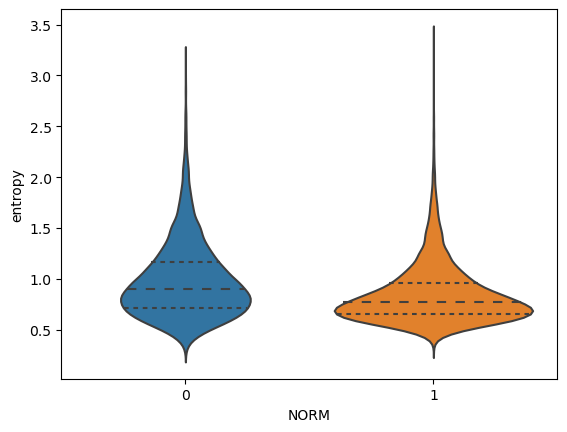

In [114]:
sbs.violinplot(data=dfm3, x="NORM", y="entropy", split=True, inner="quart")

/tmp/ipykernel_46988/2555608796.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm_bp[quantifiers] = scaler.fit_transform(dfm_bp[quantifiers])
/tmp/ipykernel_46988/2555608796.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm_bp['NORM']=dfm3['NORM']


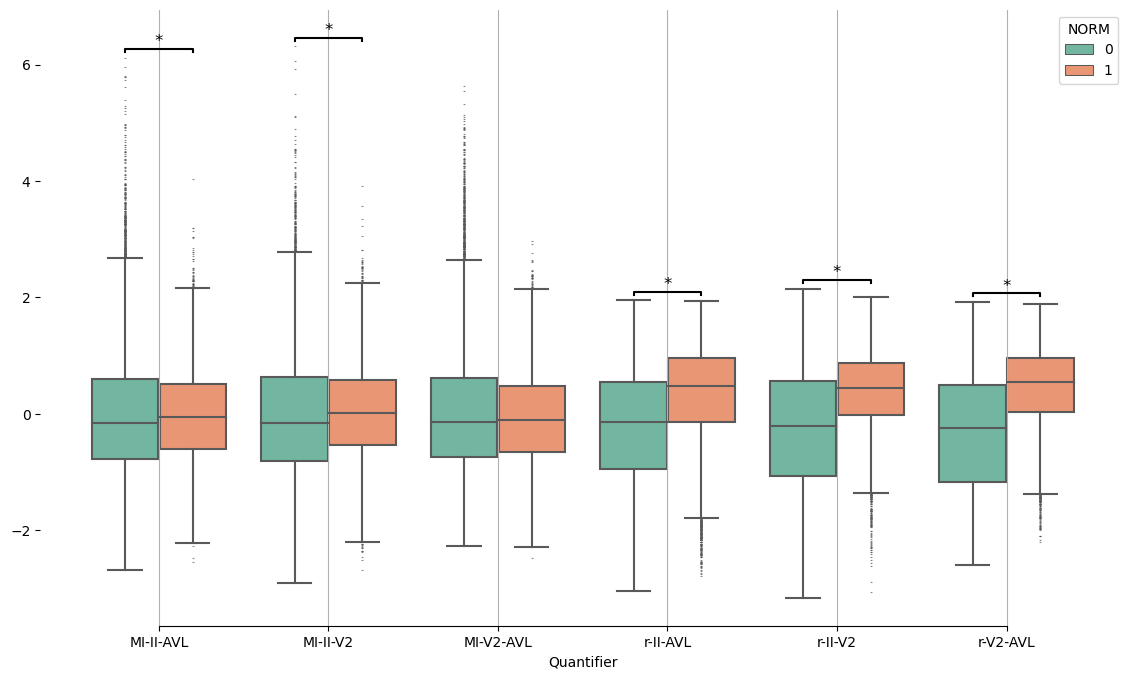

In [263]:
quantifiers = ['MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL']
rquantifiers = ['MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'r-II-AVL','r-II-V2','r-V2-AVL']

scaler = StandardScaler()
dfm_bp=dfm3[quantifiers]
dfm_bp[quantifiers] = scaler.fit_transform(dfm_bp[quantifiers])
dfm_bp['NORM']=dfm3['NORM']
dfm_bp=dfm_bp.rename(columns={"MI-II-AVL": "MI-II-AVL","MI-II-V2": "MI-II-V2","MI-V2-AVL": "MI-V2-AVL","rho-II-AVL": "r-II-AVL","rho-II-V2": "r-II-V2","rho-V2-AVL": "r-V2-AVL"})
long_df = pd.melt(dfm_bp, id_vars='NORM', value_vars=rquantifiers, var_name='Quantifier', value_name='Value')
plt.figure(figsize=(14, 8))
ax=sbs.boxplot(data=long_df, x='Quantifier', y='Value', hue='NORM', palette='Set2',fliersize=.2)#showfliers=False)
#sbs.stripplot(long_df, x='Quantifier', y='Value', hue='NORM', size=4, palette='Set2')
for i, quantifier in enumerate(rquantifiers):
    p = pvalue[quantifier][2]
    x1, x2 = i - 0.2, i + 0.2  # x-coordinates for the brackets
    y, h, col = long_df[long_df['Quantifier'] == quantifier]['Value'].max() + 0.1, 0.05, 'k'
    if p < 0.05:
        ax.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, color=col)
        significance = '*' if p < 0.001 else ' '
        ax.text((x1 + x2) / 2, y + h, significance, ha='center', va='bottom', color=col, fontsize=12)
ax.xaxis.grid(True)
ax.set(ylabel="")
sbs.despine(trim=True, left=True)

/tmp/ipykernel_46988/1087344077.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm_bp[quantifiers] = scaler.fit_transform(dfm_bp[quantifiers])
/tmp/ipykernel_46988/1087344077.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm_bp['NORM']=dfm3['NORM']


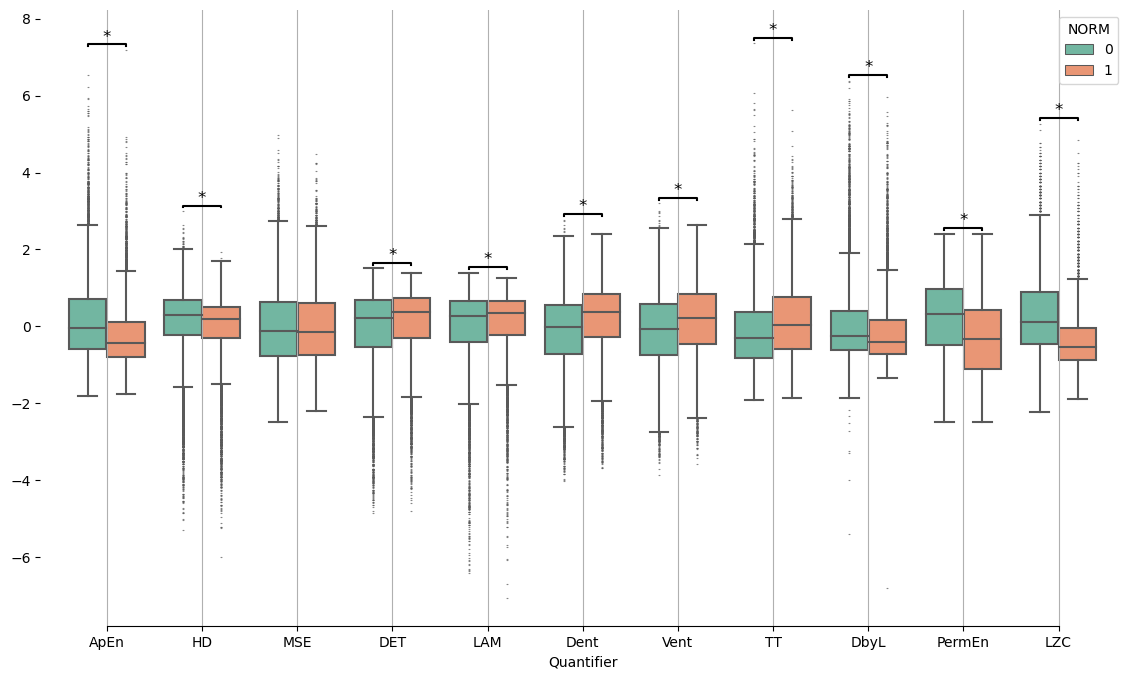

In [266]:
quantifiers = ['entropy','higuchi','mse','det','lam','dent','vent','tt','lbyd','PermEnt','LZV']
rquantifiers = ["ApEn", "HD", "MSE", "DET", "LAM","Dent", "Vent", "TT", "DbyL",'PermEn','LZC']

scaler = StandardScaler()
dfm_bp=dfm3[quantifiers]
dfm_bp[quantifiers] = scaler.fit_transform(dfm_bp[quantifiers])
dfm_bp['NORM']=dfm3['NORM']
dfm_bp=dfm_bp.rename(columns={"entropy": "ApEn","higuchi": "HD","mse": "MSE","det": "DET","lam": "LAM","dent": "Dent", "vent": "Vent", "tt": "TT", "lbyd": "DbyL",'PermEnt':'PermEn','LZV':'LZC'})
long_df = pd.melt(dfm_bp, id_vars='NORM', value_vars=rquantifiers, var_name='Quantifier', value_name='Value')
plt.figure(figsize=(14, 8))
ax=sbs.boxplot(data=long_df, x='Quantifier', y='Value', hue='NORM', palette='Set2',fliersize=.2)#showfliers=False)
for i, quantifier in enumerate(rquantifiers):
    p = pvalue[quantifier][2]
    x1, x2 = i - 0.2, i + 0.2  # x-coordinates for the brackets
    y, h, col = long_df[long_df['Quantifier'] == quantifier]['Value'].max() + 0.1, 0.05, 'k'
    if p < 0.05:
        ax.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, color=col)
        significance = '*' if p < 0.001 else ' '
        ax.text((x1 + x2) / 2, y + h, significance, ha='center', va='bottom', color=col, fontsize=12)
ax.xaxis.grid(True)
ax.set(ylabel="")
sbs.despine(trim=True, left=True)

In [73]:
print('Mean',mannwhitney_z(dfn['mean_amplitude'],dfd['mean_amplitude']))
print('Median',mannwhitney_z(dfn['median_amplitude'],dfd['median_amplitude']))
print('SD',mannwhitney_z(dfn['std_amplitude'],dfd['std_amplitude']))
print('Mean RR',mannwhitney_z(dfn['average_peak_distance'],dfd['average_peak_distance']))
print('Median RR',mannwhitney_z(dfn['median_peak_distance'],dfd['median_peak_distance']))
print('SDRR',mannwhitney_z(dfn['std_peak_distance'],dfd['std_peak_distance']))
print('f1',mannwhitney_z(dfn['f1'],dfd['f1']))
print('f2',mannwhitney_z(dfn['f2'],dfd['f2']))
print('P(f1)',mannwhitney_z(dfn['P(f1)'],dfd['P(f1)']))
print('P(f2)',mannwhitney_z(dfn['P(f2)'],dfd['P(f2)']))
print('P(f1)/P(2*f1)',mannwhitney_z(dfn['Ratio_P(f1)_P(2*f1)'],dfd['Ratio_P(f1)_P(2*f1)']))


Mean (58776732.0, 56824600.0, 0.03265236804927911, 2.1363341188350744)
Median (24889944.0, 90711388.0, 0.0, -72.03228183318353)
SD (62856799.0, 52744533.0, 1.8249301228007192e-28, 11.066449371467007)
Mean RR (64615832.0, 50985500.0, 2.5751125518246265e-50, 14.916476202688873)
Median RR (66442013.5, 49159318.5, 8.78872685578538e-80, 18.913472150849593)
SDRR (52691586.5, 62909745.5, 4.976328819426119e-29, -11.18233212954628)
f1 (58933598.0, 56667734.0, 0.013130402185084666, 2.4796695246554594)
f2 (58277171.0, 57324161.0, 0.29691348770416437, 1.0429360678422694)
P(f1) (49095529.0, 66505803.0, 6.193935179338806e-81, -19.053087175993177)
P(f2) (50173249.0, 65428083.0, 1.4429175027726852e-62, -16.694262232661)
P(f1)/P(2*f1) (56869117.0, 58732215.0, 0.04146033035713572, -2.0388967799833675)


<Axes: >

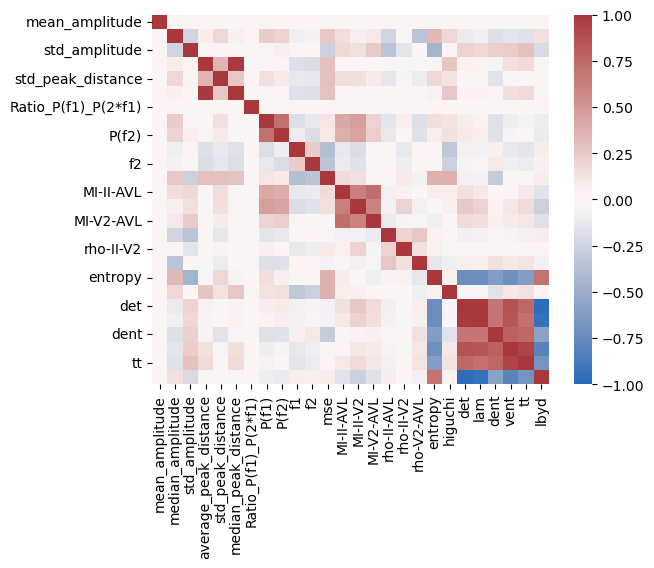

In [74]:
corrdf=dfm3[['mean_amplitude','median_amplitude','std_amplitude','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse','MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL','entropy','higuchi','det','lam','dent','vent','tt','lbyd']]
corr = corrdf.corr()
sbs.color_palette("vlag", as_cmap=True)
# plot the heatmap
sbs.heatmap(corr, cmap='vlag',vmin=-1, vmax=1)

## Multiclass classification

In [153]:
df5c=pd.read_csv('5class.csv')
dfm4=dfm_wmd.merge(df5c, left_on='ecg_id', right_on='ecg_id')

In [154]:
dfm4.head()

,ecg_id,strat_fold,id_x,mean_amplitude,median_amplitude,std_amplitude,entropy,higuchi,average_peak_distance,std_peak_distance,...,MI-II-V2,MI-V2-AVL,rho-II-AVL,rho-II-V2,rho-V2-AVL,age,sex,weight,diagnostic_superclass,superclass_num
0,1,3,1,-1.077007e-08,-0.026633,0.076493,1.411599,0.663160,0.939000,0.018138,...,1.622680,1.199449,0.609524,0.340423,0.226980,56.0,1,63.0,NORM,0.0
1,2,2,2,7.315423e-07,-0.033524,0.175579,0.801715,0.735689,1.277143,0.071056,...,1.245270,1.613528,-0.127718,0.027067,0.648935,19.0,0,70.0,NORM,0.0
2,3,5,3,4.968432e-08,-0.020845,0.097746,1.232485,0.694529,0.944000,0.021541,...,1.232038,1.282274,0.247079,0.126077,0.495225,37.0,1,69.0,NORM,0.0
3,4,3,4,-8.874212e-09,-0.061403,0.264302,1.033738,0.642166,0.799167,0.041725,...,1.855199,1.586916,-0.279600,0.239528,0.616899,24.0,0,82.0,NORM,0.0
4,5,4,5,9.933890e-07,-0.050892,0.187635,0.732804,0.702753,0.905000,0.049041,...,1.519694,1.233062,-0.445967,0.263506,0.230568,19.0,1,70.0,NORM,0.0


In [155]:
dfm4=dfm4.dropna()

In [156]:
params = { 'hidden_layer_sizes' : (50,10),
    'activation' : 'tanh',
    'solver' : 'sgd',
    'alpha' : 0.0,
    'batch_size' : 10,
    'random_state' : 1,
    'tol' : 0.0001,
    'nesterovs_momentum' : False,
    'learning_rate' : 'constant',
    'learning_rate_init' : 0.01,
    'max_iter' : 1000,
    'shuffle' : True,
    'n_iter_no_change' : 90,
    'verbose' : False }

In [157]:
#clf5class = MLPClassifier(activation = 'tanh',solver= 'sgd',alpha= 0.0,random_state=1,tol= 0.0001,nesterovs_momentum= False,learning_rate='constant',learning_rate_init= 0.01,max_iter=100,shuffle= True, hidden_layer_sizes=(50,))#random_state=1,max_iter=200,activation='relu', alpha=1.5,hidden_layer_sizes=(50,))
#clf5class.out_activation_='softmax'
clf5class = MLPClassifier(random_state=1,max_iter=200,activation='relu', alpha=1.5,hidden_layer_sizes=(50,))
#clf5class.out_activation_='softmax'

In [158]:
train_fold=[1,2,3,4,5,6,7,8]
dfm4_train=dfm4.loc[dfm4['strat_fold'].isin(train_fold)]

test_fold=[9,10]
dfm4_test=dfm4.loc[dfm4['strat_fold'].isin(test_fold)]

In [159]:
X_train4=dfm4_train[['sex','age','weight','mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse','MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL', 'det','lam','dent','vent','tt','lbyd','LZV','PermEnt']]
X_test4=dfm4_test[['sex','age','weight','mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse','MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL','det','lam','dent','vent','tt','lbyd','LZV','PermEnt']]
Y_train4=np.array(dfm4_train['superclass_num'])
Y_test4=np.array(dfm4_test['superclass_num'])

In [160]:
scaler=StandardScaler()
scaler.fit(X_train4)
X_train4=scaler.transform(X_train4)
X_test4=scaler.transform(X_test4)


In [161]:
clf5class.fit(X_train4, Y_train4)

MLPClassifier(alpha=1.5, hidden_layer_sizes=(50,), random_state=1)

In [162]:
Y_pred4=clf5class.predict(X_test4)
print(confusion_matrix(Y_test4,Y_pred4))
print(classification_report(Y_test4,Y_pred4))
print(matthews_corrcoef(Y_test4,Y_pred4))

[[1162   25   22    3    3]
 [  80  110   67    5    2]
 [ 114   42  160   32    4]
 [  85   11   52   71    3]
 [  61   19   17    4    3]]
              precision    recall  f1-score   support

         0.0       0.77      0.96      0.86      1215
         1.0       0.53      0.42      0.47       264
         2.0       0.50      0.45      0.48       352
         3.0       0.62      0.32      0.42       222
         4.0       0.20      0.03      0.05       104

    accuracy                           0.70      2157
   macro avg       0.53      0.44      0.45      2157
weighted avg       0.66      0.70      0.66      2157

0.480734653159561


In [163]:
y_prob4 = clf5class.predict_proba(X_test4)

macro_roc_auc_ovo = roc_auc_score(Y_test4, y_prob4, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    Y_test4, y_prob4, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(Y_test4, y_prob4, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    Y_test4, y_prob4, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.793863 (macro),
0.836317 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.844178 (macro),
0.871835 (weighted by prevalence)


In [164]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',y=dfm4_train['superclass_num'])

In [165]:
#XGBOOST
xg5 = XGBClassifier(n_estimators=1000,  sample_weight=classes_weights)
xg5.fit(X_train4, Y_train4)
Y_pred_xgb5=xg5.predict(X_test4)

/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:56:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "sample_weight" } are not used.

  warnings.warn(smsg, UserWarning)


In [166]:
print(confusion_matrix(Y_test4, Y_pred_xgb5))
print(classification_report(Y_test4, Y_pred_xgb5))
print(matthews_corrcoef(Y_test4, Y_pred_xgb5))

[[1131   46   27    7    4]
 [  80  103   68    5    8]
 [ 102   45  165   32    8]
 [  80   12   44   82    4]
 [  57   20   13    5    9]]
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85      1215
         1.0       0.46      0.39      0.42       264
         2.0       0.52      0.47      0.49       352
         3.0       0.63      0.37      0.46       222
         4.0       0.27      0.09      0.13       104

    accuracy                           0.69      2157
   macro avg       0.53      0.45      0.47      2157
weighted avg       0.66      0.69      0.66      2157

0.47331162239505054


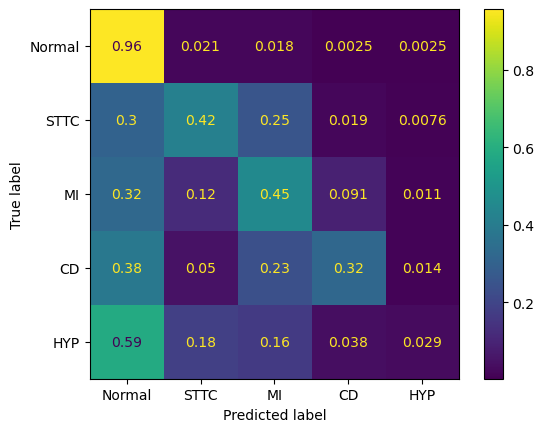

In [167]:
confusion_matrix2 = metrics.confusion_matrix(Y_test4,Y_pred4, normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = ['Normal', 'STTC','MI','CD','HYP'])
cm_display.plot()
plt.show() 

## Kruskal Wallis

In [168]:
df_n=dfm4.loc[dfm4['superclass_num']==0]
df_s=dfm4.loc[dfm4['superclass_num']==1]
df_m=dfm4.loc[dfm4['superclass_num']==2]
df_c=dfm4.loc[dfm4['superclass_num']==3]
df_h=dfm4.loc[dfm4['superclass_num']==4]
#'MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL', 'det','lam','dent','vent','tt','lbyd','LZV','PermEnt'
print(ss.kruskal(df_n['entropy'],df_s['entropy'],df_m['entropy'],df_c['entropy'],df_h['entropy']),'ent')
print(ss.kruskal(df_n['mse'],df_s['mse'],df_m['mse'],df_c['mse'],df_h['mse']),'mse')
print(ss.kruskal(df_n['higuchi'],df_s['higuchi'],df_m['higuchi'],df_c['higuchi'],df_h['higuchi']), 'Hig')
print(ss.kruskal(df_n['det'],df_s['det'],df_m['det'],df_c['det'],df_h['det']), 'Det')
print(ss.kruskal(df_n['lam'],df_s['lam'],df_m['lam'],df_c['lam'],df_h['lam']), 'Lam')
print(ss.kruskal(df_n['tt'],df_s['tt'],df_m['tt'],df_c['tt'],df_h['tt']), 'TT')
print(ss.kruskal(df_n['lbyd'],df_s['lbyd'],df_m['lbyd'],df_c['lbyd'],df_h['lbyd']), 'dbyl')
print(ss.kruskal(df_n['dent'],df_s['dent'],df_m['dent'],df_c['dent'],df_h['dent']), 'Ent_d')
print(ss.kruskal(df_n['vent'],df_s['vent'],df_m['vent'],df_c['vent'],df_h['vent']), 'Ent_l')

print(ss.kruskal(df_n['PermEnt'],df_s['PermEnt'],df_m['PermEnt'],df_c['PermEnt'],df_h['PermEnt']), 'PermEnt')
print(ss.kruskal(df_n['LZV'],df_s['LZV'],df_m['LZV'],df_c['LZV'],df_h['LZV']), 'LZC')
print(ss.kruskal(df_n['MI-II-AVL'],df_s['MI-II-AVL'],df_m['MI-II-AVL'],df_c['MI-II-AVL'],df_h['MI-II-AVL']), 'MI-ii_AVL')
print(ss.kruskal(df_n['MI-II-V2'],df_s['MI-II-V2'],df_m['MI-II-V2'],df_c['MI-II-V2'],df_h['MI-II-V2']), 'MI-II-V2')
print(ss.kruskal(df_n['MI-V2-AVL'],df_s['MI-V2-AVL'],df_m['MI-V2-AVL'],df_c['MI-V2-AVL'],df_h['MI-V2-AVL']), 'MI-V2-AVL')

print(ss.kruskal(df_n['rho-II-AVL'],df_s['rho-II-AVL'],df_m['rho-II-AVL'],df_c['rho-II-AVL'],df_h['rho-II-AVL']), 'rho-ii_AVL')
print(ss.kruskal(df_n['rho-II-V2'],df_s['rho-II-V2'],df_m['rho-II-V2'],df_c['rho-II-V2'],df_h['rho-II-V2']), 'rho-II-V2')
print(ss.kruskal(df_n['rho-V2-AVL'],df_s['rho-V2-AVL'],df_m['rho-V2-AVL'],df_c['rho-V2-AVL'],df_h['rho-V2-AVL']), 'rho-V2-AVL')

KruskalResult(statistic=568.0431421597314, pvalue=1.2760763745798905e-121) ent
KruskalResult(statistic=561.8421470882677, pvalue=2.80320881357361e-120) mse
KruskalResult(statistic=166.87904893544692, pvalue=4.889007797160512e-35) Hig
KruskalResult(statistic=186.26158520533957, pvalue=3.369321032128825e-39) Det
KruskalResult(statistic=94.15969879598045, pvalue=1.719666758158013e-19) Lam
KruskalResult(statistic=344.882522984597, pvalue=2.232873425977753e-73) TT
KruskalResult(statistic=310.32486627188285, pvalue=6.417827759660027e-66) dbyl
KruskalResult(statistic=353.5086349112171, pvalue=3.064752687245418e-75) Ent_d
KruskalResult(statistic=276.45683778857347, pvalue=1.2938630879069525e-58) Ent_l
KruskalResult(statistic=493.26059033269485, pvalue=1.921443039141815e-105) PermEnt
KruskalResult(statistic=1258.724284591897, pvalue=2.958588772837649e-271) LZC
KruskalResult(statistic=699.0476491890731, pvalue=5.603369044320016e-150) MI-ii_AVL
KruskalResult(statistic=891.9432564965209, pvalue=9.

In [170]:
hmp=np.zeros((17,4))

In [174]:
hmp[0,0]=mannwhitney_z(df_n['entropy'],df_s['entropy'])[3]
hmp[0,1]=mannwhitney_z(df_n['entropy'],df_m['entropy'])[3]
hmp[0,2]=mannwhitney_z(df_n['entropy'],df_c['entropy'])[3]
hmp[0,3]=mannwhitney_z(df_n['entropy'],df_h['entropy'])[3]

hmp[1,0]=mannwhitney_z(df_n['mse'],df_s['mse'])[3]
hmp[1,1]=mannwhitney_z(df_n['mse'],df_m['mse'])[3]
hmp[1,2]=mannwhitney_z(df_n['mse'],df_c['mse'])[3]
hmp[1,3]=mannwhitney_z(df_n['mse'],df_h['mse'])[3]

hmp[2,0]=mannwhitney_z(df_n['higuchi'],df_s['higuchi'])[3]
hmp[2,1]=mannwhitney_z(df_n['higuchi'],df_m['higuchi'])[3]
hmp[2,2]=mannwhitney_z(df_n['higuchi'],df_c['higuchi'])[3]
hmp[2,3]=mannwhitney_z(df_n['higuchi'],df_h['higuchi'])[3]

hmp[3,0]=mannwhitney_z(df_n['det'],df_s['det'])[3]
hmp[3,1]=mannwhitney_z(df_n['det'],df_m['det'])[3]
hmp[3,2]=mannwhitney_z(df_n['det'],df_c['det'])[3]
hmp[3,3]=mannwhitney_z(df_n['det'],df_h['det'])[3]

hmp[4,0]=mannwhitney_z(df_n['lam'],df_s['lam'])[3]
hmp[4,1]=mannwhitney_z(df_n['lam'],df_m['lam'])[3]
hmp[4,2]=mannwhitney_z(df_n['lam'],df_c['lam'])[3]
hmp[4,3]=mannwhitney_z(df_n['lam'],df_h['lam'])[3]

hmp[5,0]=mannwhitney_z(df_n['lbyd'],df_s['lbyd'])[3]
hmp[5,1]=mannwhitney_z(df_n['lbyd'],df_m['lbyd'])[3]
hmp[5,2]=mannwhitney_z(df_n['lbyd'],df_c['lbyd'])[3]
hmp[5,3]=mannwhitney_z(df_n['lbyd'],df_h['lbyd'])[3]

hmp[6,0]=mannwhitney_z(df_n['dent'],df_s['dent'])[3]
hmp[6,1]=mannwhitney_z(df_n['dent'],df_m['dent'])[3]
hmp[6,2]=mannwhitney_z(df_n['dent'],df_c['dent'])[3]
hmp[6,3]=mannwhitney_z(df_n['dent'],df_h['dent'])[3]

hmp[7,0]=mannwhitney_z(df_n['vent'],df_s['vent'])[3]
hmp[7,1]=mannwhitney_z(df_n['vent'],df_m['vent'])[3]
hmp[7,2]=mannwhitney_z(df_n['vent'],df_c['vent'])[3]
hmp[7,3]=mannwhitney_z(df_n['vent'],df_h['vent'])[3]

hmp[8,0]=mannwhitney_z(df_n['tt'],df_s['tt'])[3]
hmp[8,1]=mannwhitney_z(df_n['tt'],df_m['tt'])[3]
hmp[8,2]=mannwhitney_z(df_n['tt'],df_c['tt'])[3]
hmp[8,3]=mannwhitney_z(df_n['tt'],df_h['tt'])[3]

hmp[9,0]=mannwhitney_z(df_n['PermEnt'],df_s['PermEnt'])[3]
hmp[9,1]=mannwhitney_z(df_n['PermEnt'],df_m['PermEnt'])[3]
hmp[9,2]=mannwhitney_z(df_n['PermEnt'],df_c['PermEnt'])[3]
hmp[9,3]=mannwhitney_z(df_n['PermEnt'],df_h['PermEnt'])[3]

hmp[10,0]=mannwhitney_z(df_n['LZV'],df_s['LZV'])[3]
hmp[10,1]=mannwhitney_z(df_n['LZV'],df_m['LZV'])[3]
hmp[10,2]=mannwhitney_z(df_n['LZV'],df_c['LZV'])[3]
hmp[10,3]=mannwhitney_z(df_n['LZV'],df_h['LZV'])[3]


hmp[11,0]=mannwhitney_z(df_n['rho-II-AVL'],df_s['rho-II-AVL'])[3]
hmp[11,1]=mannwhitney_z(df_n['rho-II-AVL'],df_m['rho-II-AVL'])[3]
hmp[11,2]=mannwhitney_z(df_n['rho-II-AVL'],df_c['rho-II-AVL'])[3]
hmp[11,3]=mannwhitney_z(df_n['rho-II-AVL'],df_h['rho-II-AVL'])[3]


hmp[12,0]=mannwhitney_z(df_n['rho-II-V2'],df_s['rho-II-V2'])[3]
hmp[12,1]=mannwhitney_z(df_n['rho-II-V2'],df_m['rho-II-V2'])[3]
hmp[12,2]=mannwhitney_z(df_n['rho-II-V2'],df_c['rho-II-V2'])[3]
hmp[12,3]=mannwhitney_z(df_n['rho-II-V2'],df_h['rho-II-V2'])[3]


hmp[13,0]=mannwhitney_z(df_n['rho-V2-AVL'],df_s['rho-V2-AVL'])[3]
hmp[13,1]=mannwhitney_z(df_n['rho-V2-AVL'],df_m['rho-V2-AVL'])[3]
hmp[13,2]=mannwhitney_z(df_n['rho-V2-AVL'],df_c['rho-V2-AVL'])[3]
hmp[13,3]=mannwhitney_z(df_n['rho-V2-AVL'],df_h['rho-V2-AVL'])[3]


hmp[14,0]=mannwhitney_z(df_n['MI-II-AVL'],df_s['MI-II-AVL'])[3]
hmp[14,1]=mannwhitney_z(df_n['MI-II-AVL'],df_m['MI-II-AVL'])[3]
hmp[14,2]=mannwhitney_z(df_n['MI-II-AVL'],df_c['MI-II-AVL'])[3]
hmp[14,3]=mannwhitney_z(df_n['MI-II-AVL'],df_h['MI-II-AVL'])[3]


hmp[15,0]=mannwhitney_z(df_n['MI-II-V2'],df_s['MI-II-V2'])[3]
hmp[15,1]=mannwhitney_z(df_n['MI-II-V2'],df_m['MI-II-V2'])[3]
hmp[15,2]=mannwhitney_z(df_n['MI-II-V2'],df_c['MI-II-V2'])[3]
hmp[15,3]=mannwhitney_z(df_n['MI-II-V2'],df_h['MI-II-V2'])[3]


hmp[16,0]=mannwhitney_z(df_n['MI-V2-AVL'],df_s['MI-V2-AVL'])[3]
hmp[16,1]=mannwhitney_z(df_n['MI-V2-AVL'],df_m['MI-V2-AVL'])[3]
hmp[16,2]=mannwhitney_z(df_n['MI-V2-AVL'],df_c['MI-V2-AVL'])[3]
hmp[16,3]=mannwhitney_z(df_n['MI-V2-AVL'],df_h['MI-V2-AVL'])[3]

In [182]:
hmpp=np.zeros((17,4))

In [195]:
hmpp[0,0]=mannwhitney_z(df_n['higuchi'],df_s['higuchi'])[2]
hmpp[0,1]=mannwhitney_z(df_n['higuchi'],df_m['higuchi'])[2]
hmpp[0,2]=mannwhitney_z(df_n['higuchi'],df_c['higuchi'])[2]
hmpp[0,3]=mannwhitney_z(df_n['higuchi'],df_h['higuchi'])[2]

hmpp[1,0]=mannwhitney_z(df_n['entropy'],df_s['entropy'])[2]
hmpp[1,1]=mannwhitney_z(df_n['entropy'],df_m['entropy'])[2]
hmpp[1,2]=mannwhitney_z(df_n['entropy'],df_c['entropy'])[2]
hmpp[1,3]=mannwhitney_z(df_n['entropy'],df_h['entropy'])[2]

hmpp[2,0]=mannwhitney_z(df_n['mse'],df_s['mse'])[2]
hmpp[2,1]=mannwhitney_z(df_n['mse'],df_m['mse'])[2]
hmpp[2,2]=mannwhitney_z(df_n['mse'],df_c['mse'])[2]
hmpp[2,3]=mannwhitney_z(df_n['mse'],df_h['mse'])[2]

hmpp[3,0]=mannwhitney_z(df_n['PermEnt'],df_s['PermEnt'])[2]
hmpp[3,1]=mannwhitney_z(df_n['PermEnt'],df_m['PermEnt'])[2]
hmpp[3,2]=mannwhitney_z(df_n['PermEnt'],df_c['PermEnt'])[2]
hmpp[3,3]=mannwhitney_z(df_n['PermEnt'],df_h['PermEnt'])[2]

hmpp[4,0]=mannwhitney_z(df_n['LZV'],df_s['LZV'])[2]
hmpp[4,1]=mannwhitney_z(df_n['LZV'],df_m['LZV'])[2]
hmpp[4,2]=mannwhitney_z(df_n['LZV'],df_c['LZV'])[2]
hmpp[4,3]=mannwhitney_z(df_n['LZV'],df_h['LZV'])[2]



hmpp[5,0]=mannwhitney_z(df_n['det'],df_s['det'])[2]
hmpp[5,1]=mannwhitney_z(df_n['det'],df_m['det'])[2]
hmpp[5,2]=mannwhitney_z(df_n['det'],df_c['det'])[2]
hmpp[5,3]=mannwhitney_z(df_n['det'],df_h['det'])[2]

hmpp[6,0]=mannwhitney_z(df_n['lam'],df_s['lam'])[2]
hmpp[6,1]=mannwhitney_z(df_n['lam'],df_m['lam'])[2]
hmpp[6,2]=mannwhitney_z(df_n['lam'],df_c['lam'])[2]
hmpp[6,3]=mannwhitney_z(df_n['lam'],df_h['lam'])[2]

hmpp[7,0]=mannwhitney_z(df_n['lbyd'],df_s['lbyd'])[2]
hmpp[7,1]=mannwhitney_z(df_n['lbyd'],df_m['lbyd'])[2]
hmpp[7,2]=mannwhitney_z(df_n['lbyd'],df_c['lbyd'])[2]
hmpp[7,3]=mannwhitney_z(df_n['lbyd'],df_h['lbyd'])[2]

hmpp[8,0]=mannwhitney_z(df_n['dent'],df_s['dent'])[2]
hmpp[8,1]=mannwhitney_z(df_n['dent'],df_m['dent'])[2]
hmpp[8,2]=mannwhitney_z(df_n['dent'],df_c['dent'])[2]
hmpp[8,3]=mannwhitney_z(df_n['dent'],df_h['dent'])[2]

hmpp[9,0]=mannwhitney_z(df_n['vent'],df_s['vent'])[2]
hmpp[9,1]=mannwhitney_z(df_n['vent'],df_m['vent'])[2]
hmpp[9,2]=mannwhitney_z(df_n['vent'],df_c['vent'])[2]
hmpp[9,3]=mannwhitney_z(df_n['vent'],df_h['vent'])[2]

hmpp[10,0]=mannwhitney_z(df_n['tt'],df_s['tt'])[2]
hmpp[10,1]=mannwhitney_z(df_n['tt'],df_m['tt'])[2]
hmpp[10,2]=mannwhitney_z(df_n['tt'],df_c['tt'])[2]
hmpp[10,3]=mannwhitney_z(df_n['tt'],df_h['tt'])[2]

hmpp[11,0]=mannwhitney_z(df_n['rho-II-AVL'],df_s['rho-II-AVL'])[2]
hmpp[11,1]=mannwhitney_z(df_n['rho-II-AVL'],df_m['rho-II-AVL'])[2]
hmpp[11,2]=mannwhitney_z(df_n['rho-II-AVL'],df_c['rho-II-AVL'])[2]
hmpp[11,3]=mannwhitney_z(df_n['rho-II-AVL'],df_h['rho-II-AVL'])[2]


hmpp[12,0]=mannwhitney_z(df_n['rho-II-V2'],df_s['rho-II-V2'])[2]
hmpp[12,1]=mannwhitney_z(df_n['rho-II-V2'],df_m['rho-II-V2'])[2]
hmpp[12,2]=mannwhitney_z(df_n['rho-II-V2'],df_c['rho-II-V2'])[2]
hmpp[12,3]=mannwhitney_z(df_n['rho-II-V2'],df_h['rho-II-V2'])[2]


hmpp[13,0]=mannwhitney_z(df_n['rho-V2-AVL'],df_s['rho-V2-AVL'])[2]
hmpp[13,1]=mannwhitney_z(df_n['rho-V2-AVL'],df_m['rho-V2-AVL'])[2]
hmpp[13,2]=mannwhitney_z(df_n['rho-V2-AVL'],df_c['rho-V2-AVL'])[2]
hmpp[13,3]=mannwhitney_z(df_n['rho-V2-AVL'],df_h['rho-V2-AVL'])[2]


hmpp[14,0]=mannwhitney_z(df_n['MI-II-AVL'],df_s['MI-II-AVL'])[2]
hmpp[14,1]=mannwhitney_z(df_n['MI-II-AVL'],df_m['MI-II-AVL'])[2]
hmpp[14,2]=mannwhitney_z(df_n['MI-II-AVL'],df_c['MI-II-AVL'])[2]
hmpp[14,3]=mannwhitney_z(df_n['MI-II-AVL'],df_h['MI-II-AVL'])[2]


hmpp[15,0]=mannwhitney_z(df_n['MI-II-V2'],df_s['MI-II-V2'])[2]
hmpp[15,1]=mannwhitney_z(df_n['MI-II-V2'],df_m['MI-II-V2'])[2]
hmpp[15,2]=mannwhitney_z(df_n['MI-II-V2'],df_c['MI-II-V2'])[2]
hmpp[15,3]=mannwhitney_z(df_n['MI-II-V2'],df_h['MI-II-V2'])[2]


hmpp[16,0]=mannwhitney_z(df_n['MI-V2-AVL'],df_s['MI-V2-AVL'])[2]
hmpp[16,1]=mannwhitney_z(df_n['MI-V2-AVL'],df_m['MI-V2-AVL'])[2]
hmpp[16,2]=mannwhitney_z(df_n['MI-V2-AVL'],df_c['MI-V2-AVL'])[2]
hmpp[16,3]=mannwhitney_z(df_n['MI-V2-AVL'],df_h['MI-V2-AVL'])[2]

In [211]:
for i in range(17):
    for j in range (4):
        if(hmpp[i,j]<.001):
            hmp[i,j]=hmp[i,j]
        else:
            hmp[i,j]=0

In [208]:
vcenter = 0
vmin, vmax = hmp.min(), hmp.max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)
colormap = cm.RdBu

In [209]:
['higuchi','entropy','mse','PermEnt','LZV', 'det','lam','dent','vent','tt','lbyd','MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL']

['higuchi',
 'entropy',
 'mse',
 'PermEnt',
 'LZV',
 'det',
 'lam',
 'dent',
 'vent',
 'tt',
 'lbyd',
 'MI-II-AVL',
 'MI-II-V2',
 'MI-V2-AVL',
 'rho-II-AVL',
 'rho-II-V2',
 'rho-V2-AVL']

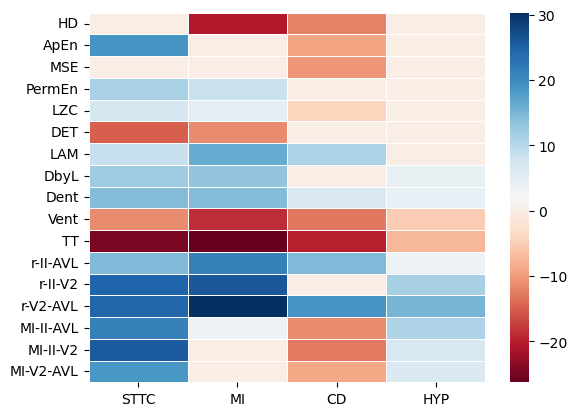

In [210]:
ax = sbs.heatmap(hmp, linewidth=0.5, cmap=colormap)
ax.set_xticklabels(['STTC','MI','CD','HYP'])
ax.set_yticklabels(['HD','ApEn','MSE','PermEn','LZC','DET','LAM','DbyL','Dent','Vent','TT','r-II-AVL','r-II-V2','r-V2-AVL','MI-II-AVL','MI-II-V2','MI-V2-AVL'])
plt.yticks(rotation=0)
#'NORM':0,'STTC':1,'MI':2,'CD':3,'HYP':4
plt.show()

## Tensorflow

In [525]:
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import keras_tuner
from keras_tuner.tuners import RandomSearch
import keras
from keras.metrics import AUC
from keras_tuner.engine.hyperparameters import HyperParameters
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import backend as K
from keras.models import Sequential
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [526]:
train_fold=[1,2,3,4,5,6,7]
dfm5_train=dfm4.loc[dfm4['strat_fold'].isin(train_fold)]
dfm5_val=dfm4.loc[dfm4['strat_fold']==8]
test_fold=[9,10]
dfm5_test=dfm4.loc[dfm4['strat_fold'].isin(test_fold)]

In [527]:
X_train5=dfm5_train[['sex','age','weight','mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse','MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL', 'det','lam','dent','vent','tt','lbyd','LZV','PermEnt']]
X_test5=dfm5_test[['sex','age','weight','mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse','MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL','det','lam','dent','vent','tt','lbyd','LZV','PermEnt']]
Y_train5=np.array(dfm5_train['superclass_num'])
Y_test5=np.array(dfm5_test['superclass_num'])
X_val5=dfm5_val[['sex','age','weight','mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse','MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL','det','lam','dent','vent','tt','lbyd','LZV','PermEnt']]
Y_val5=np.array(dfm5_val['superclass_num'])


In [335]:
scaler=StandardScaler()
scaler.fit(X_train5)
X_train5=scaler.transform(X_train5)
X_test5=scaler.transform(X_test5)

X_val5=scaler.transform(X_val5)

In [336]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(Y_train5), y=Y_train5)

# Convert the result into a dictionary where keys are class labels and values are weights
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

In [528]:
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        cross_entropy = CategoricalCrossentropy()(y_true, y_pred)
        pt = tf.exp(-cross_entropy)
        focal_loss_value = alpha * (1 - pt) ** gamma * cross_entropy
        return focal_loss_value
    return focal_loss_fixed


In [529]:
def f1_metric(y_true, y_pred):
    # Convert predictions to one-hot or binary labels
    y_pred_classes = tf.argmax(y_pred, axis=1)
    y_true_classes = tf.cast(y_true, tf.int64)
    
    tp = tf.reduce_sum(tf.cast(y_true_classes * y_pred_classes, 'float32'))
    fp = tf.reduce_sum(tf.cast((1 - y_true_classes) * y_pred_classes, 'float32'))
    fn = tf.reduce_sum(tf.cast(y_true_classes * (1 - y_pred_classes), 'float32'))

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1

In [373]:
from tensorflow.keras.utils import to_categorical

# One-hot encode training and validation labels
Y_train5_oh = to_categorical(Y_train5, num_classes=5)
Y_val5_oh = to_categorical(Y_val5, num_classes=5)
Y_test5_oh = to_categorical(Y_test5, num_classes=5)  # If using in evaluation

In [530]:
np.random.seed(42)
tf.random.set_seed(42)

In [539]:
cr = []
mcc= []
mac_auc_ovo=[]
weight_auc_ovo=[]
mac_auc_ovr=[]
weight_auc_ovr=[]
# Define the number of folds
num_folds = len(dfm4['strat_fold'].unique())
print(num_folds)
for fold in range(1,num_folds+1): 
    print(fold)
    dfm5_train=dfm4.loc[dfm4['strat_fold']!=fold]
    dfm5_test=dfm4.loc[dfm4['strat_fold']==fold]
    X_train5=dfm5_train[['sex','age','weight','mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse','MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL', 'det','lam','dent','vent','tt','lbyd','LZV','PermEnt']]
    X_test5=dfm5_test[['sex','age','weight','mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse','MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL','det','lam','dent','vent','tt','lbyd','LZV','PermEnt']]
    Y_train5=np.array(dfm5_train['superclass_num'])
    Y_test5=np.array(dfm5_test['superclass_num'])
    X_val5=dfm5_val[['sex','age','weight','mean_amplitude','median_amplitude','std_amplitude','entropy','higuchi','average_peak_distance','std_peak_distance','median_peak_distance','Ratio_P(f1)_P(2*f1)','P(f1)','P(f2)','f1','f2','mse','MI-II-AVL','MI-II-V2','MI-V2-AVL' ,'rho-II-AVL','rho-II-V2','rho-V2-AVL','det','lam','dent','vent','tt','lbyd','LZV','PermEnt']]
    Y_val5=np.array(dfm5_val['superclass_num'])
    scaler=StandardScaler()
    scaler.fit(X_train5)
    X_train5=scaler.transform(X_train5)
    X_test5=scaler.transform(X_test5)
    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(Y_train5), y=Y_train5)

    # Convert the result into a dictionary where keys are class labels and values are weights
    class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
    X_val5=scaler.transform(X_val5)
    model3 = Sequential()
    #model3.add(LeakyReLU(alpha=0.1))
    # Input layer with dropout and regularization
    model3.add(Dense(200, input_shape=(31,), activation=LeakyReLU(alpha=0.1), kernel_regularizer=l2(0.001)))
    model3.add(BatchNormalization())
    model3.add(Dropout(0.3))

    # Hidden layers
    model3.add(Dense(50, activation='relu', kernel_regularizer=l2(0.001)))
    model3.add(BatchNormalization())
    model3.add(Dropout(0.05))


    # Output layer
    model3.add(Dense(5, activation='softmax'))

    # Compile
    model3.compile(loss='sparse_categorical_crossentropy', 
                   optimizer=Adam(learning_rate=0.001), 
                   metrics=['accuracy',f1_metric])

    # Callbacks
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True, verbose=1)

    # Train
    history = model3.fit(X_train5, Y_train5, validation_data=(X_val5, Y_val5), 
                         epochs=200, batch_size=500, 
                         class_weight=class_weight_dict, 
                         callbacks=[reduce_lr,early_stopping])
    y_pred_dnn = model3.predict(X_test5)
    y_pred_classes = y_pred_dnn.argmax(axis=1)
    cr.append(classification_report(Y_test5, y_pred_classes, output_dict=True))
    mcc.append(matthews_corrcoef(Y_test5, y_pred_classes))
    macro_roc_auc_ovo = roc_auc_score(Y_test5, y_pred_dnn, multi_class="ovo", average="macro")
    weighted_roc_auc_ovo = roc_auc_score(Y_test5, y_pred_dnn, multi_class="ovo", average="weighted")
    macro_roc_auc_ovr = roc_auc_score(Y_test5, y_pred_dnn, multi_class="ovr", average="macro")
    weighted_roc_auc_ovr = roc_auc_score(Y_test5, y_pred_dnn, multi_class="ovr", average="weighted")
    mac_auc_ovo.append(macro_roc_auc_ovo)
    weight_auc_ovo.append(weighted_roc_auc_ovo)
    mac_auc_ovr.append(macro_roc_auc_ovr)
    weight_auc_ovr.append(weighted_roc_auc_ovr)

10
1
Epoch 1/200


/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2472 - f1_metric: 1.3291 - loss: 2.0946 - val_accuracy: 0.5006 - val_f1_metric: 1.6159 - val_loss: 1.5481 - learning_rate: 0.0010
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4355 - f1_metric: 1.5391 - loss: 1.6071 - val_accuracy: 0.5117 - val_f1_metric: 1.6692 - val_loss: 1.5143 - learning_rate: 0.0010
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4999 - f1_metric: 1.6311 - loss: 1.4717 - val_accuracy: 0.5216 - val_f1_metric: 1.6948 - val_loss: 1.4926 - learning_rate: 0.0010
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5306 - f1_metric: 1.6642 - loss: 1.4251 - val_accuracy: 0.5250 - val_f1_metric: 1.6793 - val_loss: 1.4738 - learning_rate: 0.0010
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5470 - f1_metric: 1.6988 - loss: 1.3801 - val_accuracy: 0.5450 - val_f1_metric: 1.7324 - val_loss: 1.4379 - learning_rate: 0.0010
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━

Epoch 37/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6438 - f1_metric: 1.8631 - loss: 1.0573 - val_accuracy: 0.7014 - val_f1_metric: 1.9884 - val_loss: 0.9415 - learning_rate: 0.0010
Epoch 38/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6390 - f1_metric: 1.8696 - loss: 1.0541 - val_accuracy: 0.7081 - val_f1_metric: 2.0061 - val_loss: 0.9384 - learning_rate: 0.0010
Epoch 39/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6440 - f1_metric: 1.8849 - loss: 1.0500 - val_accuracy: 0.7014 - val_f1_metric: 1.9904 - val_loss: 0.9263 - learning_rate: 0.0010
Epoch 40/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6449 - f1_metric: 1.8933 - loss: 1.0478 - val_accuracy: 0.7103 - val_f1_metric: 2.0206 - val_loss: 0.9214 - learning_rate: 0.0010
Epoch 41/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6360 - f1_metric: 1.8581 - loss: 1.0476 - val_accuracy: 0.7037 - val_f1_metric: 2.0199 - val_loss: 0.9164 - learning_rate: 0.0010
Epoch 42/200
17/17 ━

Epoch 73/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6694 - f1_metric: 1.9152 - loss: 0.9183 - val_accuracy: 0.7580 - val_f1_metric: 2.1524 - val_loss: 0.7863 - learning_rate: 0.0010
Epoch 74/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6695 - f1_metric: 1.9306 - loss: 0.8962 - val_accuracy: 0.7469 - val_f1_metric: 2.1113 - val_loss: 0.7881 - learning_rate: 0.0010
Epoch 75/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6815 - f1_metric: 1.9719 - loss: 0.9053 - val_accuracy: 0.7514 - val_f1_metric: 2.1524 - val_loss: 0.7748 - learning_rate: 0.0010
Epoch 76/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6732 - f1_metric: 1.9449 - loss: 0.9046 - val_accuracy: 0.7525 - val_f1_metric: 2.1314 - val_loss: 0.7764 - learning_rate: 0.0010
Epoch 77/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6815 - f1_metric: 1.9350 - loss: 0.8835 - val_accuracy: 0.7592 - val_f1_metric: 2.1374 - val_loss: 0.7823 - learning_rate: 0.0010
Epoch 78/200
17/17 ━

Epoch 142/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7127 - f1_metric: 1.9860 - loss: 0.7369 - val_accuracy: 0.7980 - val_f1_metric: 2.2472 - val_loss: 0.6545 - learning_rate: 5.0000e-04
Epoch 143/200
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6960 - f1_metric: 2.0285 - loss: 0.7454
Epoch 143: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7116 - f1_metric: 2.0167 - loss: 0.7481 - val_accuracy: 0.8013 - val_f1_metric: 2.2522 - val_loss: 0.6459 - learning_rate: 5.0000e-04
Epoch 144/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7191 - f1_metric: 1.9989 - loss: 0.7316 - val_accuracy: 0.8002 - val_f1_metric: 2.2427 - val_loss: 0.6428 - learning_rate: 2.5000e-04
Epoch 145/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7144 - f1_metric: 2.0150 - loss: 0.7366 - val_accuracy: 0.8113 - val_f1_metric: 2.2661 - val_loss: 0.6406 - learning_rate: 2.5000e-04
Epoch 146/200
17/17 ━━━━

/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3186 - f1_metric: 1.4780 - loss: 2.0782 - val_accuracy: 0.3241 - val_f1_metric: 1.3621 - val_loss: 1.6938 - learning_rate: 0.0010
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4836 - f1_metric: 1.5265 - loss: 1.5985 - val_accuracy: 0.4861 - val_f1_metric: 1.6157 - val_loss: 1.5307 - learning_rate: 0.0010
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5206 - f1_metric: 1.5984 - loss: 1.4814 - val_accuracy: 0.5350 - val_f1_metric: 1.7909 - val_loss: 1.4400 - learning_rate: 0.0010
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5416 - f1_metric: 1.6973 - loss: 1.4322 - val_accuracy: 0.5527 - val_f1_metric: 1.8313 - val_loss: 1.3786 - learning_rate: 0.0010
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5611 - f1_metric: 1.7209 - loss: 1.3849 - val_accuracy: 0.5771 - val_f1_metric: 1.8813 - val_loss: 1.3251 - learning_rate: 0.0010
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━

Epoch 37/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6168 - f1_metric: 1.8470 - loss: 1.0847 - val_accuracy: 0.6804 - val_f1_metric: 2.0230 - val_loss: 0.9415 - learning_rate: 0.0010
Epoch 38/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6304 - f1_metric: 1.8924 - loss: 1.0530 - val_accuracy: 0.6892 - val_f1_metric: 2.0192 - val_loss: 0.9307 - learning_rate: 0.0010
Epoch 39/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6287 - f1_metric: 1.8446 - loss: 1.0608 - val_accuracy: 0.6915 - val_f1_metric: 2.0289 - val_loss: 0.9347 - learning_rate: 0.0010
Epoch 40/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6253 - f1_metric: 1.8625 - loss: 1.0629 - val_accuracy: 0.6959 - val_f1_metric: 2.0365 - val_loss: 0.9257 - learning_rate: 0.0010
Epoch 41/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6334 - f1_metric: 1.8725 - loss: 1.0575 - val_accuracy: 0.6937 - val_f1_metric: 2.0371 - val_loss: 0.9278 - learning_rate: 0.0010
Epoch 42/200
17/17 ━

Epoch 73/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6630 - f1_metric: 1.9504 - loss: 0.9052 - val_accuracy: 0.7503 - val_f1_metric: 2.1699 - val_loss: 0.7947 - learning_rate: 0.0010
Epoch 74/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6735 - f1_metric: 1.9369 - loss: 0.8951 - val_accuracy: 0.7592 - val_f1_metric: 2.1547 - val_loss: 0.7909 - learning_rate: 0.0010
Epoch 75/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6668 - f1_metric: 1.9519 - loss: 0.9151 - val_accuracy: 0.7514 - val_f1_metric: 2.1666 - val_loss: 0.7887 - learning_rate: 0.0010
Epoch 76/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6644 - f1_metric: 1.9021 - loss: 0.9076 - val_accuracy: 0.7458 - val_f1_metric: 2.1457 - val_loss: 0.7865 - learning_rate: 0.0010
Epoch 77/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6834 - f1_metric: 1.9680 - loss: 0.8828 - val_accuracy: 0.7536 - val_f1_metric: 2.1559 - val_loss: 0.7890 - learning_rate: 0.0010
Epoch 78/200
17/17 ━

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7117 - f1_metric: 2.0250 - loss: 0.7440 - val_accuracy: 0.7980 - val_f1_metric: 2.2490 - val_loss: 0.6657 - learning_rate: 2.5000e-04
Epoch 142/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7108 - f1_metric: 2.0346 - loss: 0.7467 - val_accuracy: 0.8024 - val_f1_metric: 2.2639 - val_loss: 0.6581 - learning_rate: 2.5000e-04
Epoch 143/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7036 - f1_metric: 2.0051 - loss: 0.7357 - val_accuracy: 0.8024 - val_f1_metric: 2.2713 - val_loss: 0.6549 - learning_rate: 2.5000e-04
Epoch 144/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7180 - f1_metric: 2.0497 - loss: 0.7466 - val_accuracy: 0.8036 - val_f1_metric: 2.2596 - val_loss: 0.6523 - learning_rate: 2.5000e-04
Epoch 145/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7141 - f1_metric: 2.0125 - loss: 0.7404 - val_accuracy: 0.8024 - val_f1_metric: 2.2666 - val_loss: 0.6497 - learning_rate: 2.5000e-04
Epoch 146

/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2887 - f1_metric: 1.3362 - loss: 1.9736 - val_accuracy: 0.4673 - val_f1_metric: 1.5648 - val_loss: 1.5334 - learning_rate: 0.0010
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4707 - f1_metric: 1.5669 - loss: 1.5420 - val_accuracy: 0.5183 - val_f1_metric: 1.7439 - val_loss: 1.4891 - learning_rate: 0.0010
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5066 - f1_metric: 1.6179 - loss: 1.4528 - val_accuracy: 0.5050 - val_f1_metric: 1.7159 - val_loss: 1.4747 - learning_rate: 0.0010
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5297 - f1_metric: 1.6482 - loss: 1.3976 - val_accuracy: 0.5139 - val_f1_metric: 1.7227 - val_loss: 1.4454 - learning_rate: 0.0010
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5418 - f1_metric: 1.6655 - loss: 1.3739 - val_accuracy: 0.5083 - val_f1_metric: 1.6936 - val_loss: 1.4296 - learning_rate: 0.0010
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━

Epoch 37/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6336 - f1_metric: 1.8646 - loss: 1.0721 - val_accuracy: 0.6981 - val_f1_metric: 2.0041 - val_loss: 0.9332 - learning_rate: 0.0010
Epoch 38/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6362 - f1_metric: 1.8508 - loss: 1.0586 - val_accuracy: 0.7003 - val_f1_metric: 1.9880 - val_loss: 0.9269 - learning_rate: 0.0010
Epoch 39/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6385 - f1_metric: 1.8490 - loss: 1.0453 - val_accuracy: 0.7125 - val_f1_metric: 2.0175 - val_loss: 0.9153 - learning_rate: 0.0010
Epoch 40/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6315 - f1_metric: 1.8473 - loss: 1.0629 - val_accuracy: 0.6970 - val_f1_metric: 2.0027 - val_loss: 0.9159 - learning_rate: 0.0010
Epoch 41/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6287 - f1_metric: 1.8117 - loss: 1.0498 - val_accuracy: 0.7037 - val_f1_metric: 2.0016 - val_loss: 0.9226 - learning_rate: 0.0010
Epoch 42/200
17/17 ━

Epoch 73/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6780 - f1_metric: 1.9481 - loss: 0.8940 - val_accuracy: 0.7525 - val_f1_metric: 2.1075 - val_loss: 0.7871 - learning_rate: 0.0010
Epoch 74/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6745 - f1_metric: 1.9300 - loss: 0.8956 - val_accuracy: 0.7492 - val_f1_metric: 2.0810 - val_loss: 0.7820 - learning_rate: 0.0010
Epoch 75/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6733 - f1_metric: 1.9229 - loss: 0.8948 - val_accuracy: 0.7614 - val_f1_metric: 2.1107 - val_loss: 0.7753 - learning_rate: 0.0010
Epoch 76/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6671 - f1_metric: 1.9129 - loss: 0.9017 - val_accuracy: 0.7680 - val_f1_metric: 2.1471 - val_loss: 0.7648 - learning_rate: 0.0010
Epoch 77/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6680 - f1_metric: 1.9171 - loss: 0.8847 - val_accuracy: 0.7703 - val_f1_metric: 2.1563 - val_loss: 0.7656 - learning_rate: 0.0010
Epoch 78/200
17/17 ━

Epoch 142/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7127 - f1_metric: 2.0178 - loss: 0.7286 - val_accuracy: 0.8047 - val_f1_metric: 2.2311 - val_loss: 0.6545 - learning_rate: 5.0000e-04
Epoch 143/200
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7096 - f1_metric: 1.9958 - loss: 0.7336 
Epoch 143: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7107 - f1_metric: 1.9968 - loss: 0.7343 - val_accuracy: 0.7925 - val_f1_metric: 2.1837 - val_loss: 0.6602 - learning_rate: 5.0000e-04
Epoch 144/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7063 - f1_metric: 2.0266 - loss: 0.7337 - val_accuracy: 0.7902 - val_f1_metric: 2.1798 - val_loss: 0.6606 - learning_rate: 2.5000e-04
Epoch 145/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7079 - f1_metric: 1.9931 - loss: 0.7328 - val_accuracy: 0.7902 - val_f1_metric: 2.1857 - val_loss: 0.6556 - learning_rate: 2.5000e-04
Epoch 146/200
17/17 ━━━━

/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2090 - f1_metric: 1.3399 - loss: 2.1308 - val_accuracy: 0.5438 - val_f1_metric: 1.6742 - val_loss: 1.4890 - learning_rate: 0.0010
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4152 - f1_metric: 1.5294 - loss: 1.6073 - val_accuracy: 0.4828 - val_f1_metric: 1.6846 - val_loss: 1.5177 - learning_rate: 0.0010
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4751 - f1_metric: 1.6436 - loss: 1.4829 - val_accuracy: 0.4484 - val_f1_metric: 1.6734 - val_loss: 1.5404 - learning_rate: 0.0010
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5128 - f1_metric: 1.7029 - loss: 1.4351 - val_accuracy: 0.4528 - val_f1_metric: 1.6817 - val_loss: 1.5280 - learning_rate: 0.0010
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5231 - f1_metric: 1.6942 - loss: 1.3881 - val_accuracy: 0.4484 - val_f1_metric: 1.6868 - val_loss: 1.5277 - learning_rate: 0.0010
Epoch 6/200
 1/17 ━━━━━━━━━━━━━━━━━━

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6425 - f1_metric: 1.9255 - loss: 1.0363 - val_accuracy: 0.6948 - val_f1_metric: 2.0088 - val_loss: 0.9379 - learning_rate: 5.0000e-04
Epoch 71/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6441 - f1_metric: 1.9070 - loss: 1.0201 - val_accuracy: 0.6970 - val_f1_metric: 2.0005 - val_loss: 0.9381 - learning_rate: 5.0000e-04
Epoch 72/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6419 - f1_metric: 1.9002 - loss: 1.0268 - val_accuracy: 0.6948 - val_f1_metric: 1.9906 - val_loss: 0.9396 - learning_rate: 5.0000e-04
Epoch 73/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6316 - f1_metric: 1.9050 - loss: 1.0267 - val_accuracy: 0.7037 - val_f1_metric: 2.0098 - val_loss: 0.9364 - learning_rate: 5.0000e-04
Epoch 74/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6467 - f1_metric: 1.9271 - loss: 1.0120 - val_accuracy: 0.7037 - val_f1_metric: 2.0141 - val_loss: 0.9301 - learning_rate: 5.0000e-04
Epoch 75/200


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6698 - f1_metric: 1.9493 - loss: 0.9106 - val_accuracy: 0.7358 - val_f1_metric: 2.0722 - val_loss: 0.8353 - learning_rate: 1.2500e-04
Epoch 139/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6688 - f1_metric: 1.9791 - loss: 0.8918 - val_accuracy: 0.7347 - val_f1_metric: 2.0657 - val_loss: 0.8337 - learning_rate: 1.2500e-04
Epoch 140/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6760 - f1_metric: 1.9651 - loss: 0.8971 - val_accuracy: 0.7358 - val_f1_metric: 2.0634 - val_loss: 0.8324 - learning_rate: 1.2500e-04
Epoch 141/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6810 - f1_metric: 2.0000 - loss: 0.8950 - val_accuracy: 0.7303 - val_f1_metric: 2.0612 - val_loss: 0.8333 - learning_rate: 1.2500e-04
Epoch 142/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6773 - f1_metric: 1.9761 - loss: 0.8980 - val_accuracy: 0.7314 - val_f1_metric: 2.0613 - val_loss: 0.8337 - learning_rate: 1.2500e-04
Epoch 143

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6784 - f1_metric: 1.9741 - loss: 0.8927 - val_accuracy: 0.7370 - val_f1_metric: 2.0692 - val_loss: 0.8190 - learning_rate: 6.2500e-05
Epoch 173/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6767 - f1_metric: 1.9874 - loss: 0.8751 - val_accuracy: 0.7370 - val_f1_metric: 2.0739 - val_loss: 0.8186 - learning_rate: 6.2500e-05
Epoch 174/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6848 - f1_metric: 1.9962 - loss: 0.8690 - val_accuracy: 0.7403 - val_f1_metric: 2.0822 - val_loss: 0.8178 - learning_rate: 6.2500e-05
Epoch 175/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6760 - f1_metric: 1.9882 - loss: 0.8860 - val_accuracy: 0.7414 - val_f1_metric: 2.0825 - val_loss: 0.8175 - learning_rate: 6.2500e-05
Epoch 176/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6790 - f1_metric: 1.9764 - loss: 0.8945 - val_accuracy: 0.7370 - val_f1_metric: 2.0797 - val_loss: 0.8181 - learning_rate: 6.2500e-05
Epoch 177

/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3108 - f1_metric: 1.4145 - loss: 2.0218 - val_accuracy: 0.4517 - val_f1_metric: 1.5856 - val_loss: 1.5371 - learning_rate: 0.0010
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4812 - f1_metric: 1.5438 - loss: 1.5706 - val_accuracy: 0.5350 - val_f1_metric: 1.7128 - val_loss: 1.4497 - learning_rate: 0.0010
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5361 - f1_metric: 1.6619 - loss: 1.4535 - val_accuracy: 0.5949 - val_f1_metric: 1.7790 - val_loss: 1.3935 - learning_rate: 0.0010
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5584 - f1_metric: 1.7000 - loss: 1.3860 - val_accuracy: 0.6337 - val_f1_metric: 1.8331 - val_loss: 1.3406 - learning_rate: 0.0010
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5687 - f1_metric: 1.7293 - loss: 1.3768 - val_accuracy: 0.6582 - val_f1_metric: 1.8919 - val_loss: 1.3018 - learning_rate: 0.0010
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━

Epoch 37/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6430 - f1_metric: 1.8863 - loss: 1.0580 - val_accuracy: 0.7137 - val_f1_metric: 2.0141 - val_loss: 0.9039 - learning_rate: 0.0010
Epoch 38/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6393 - f1_metric: 1.8558 - loss: 1.0451 - val_accuracy: 0.7092 - val_f1_metric: 2.0096 - val_loss: 0.8998 - learning_rate: 0.0010
Epoch 39/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6388 - f1_metric: 1.8609 - loss: 1.0497 - val_accuracy: 0.7125 - val_f1_metric: 2.0168 - val_loss: 0.8949 - learning_rate: 0.0010
Epoch 40/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6447 - f1_metric: 1.8472 - loss: 1.0362 - val_accuracy: 0.7125 - val_f1_metric: 2.0137 - val_loss: 0.8966 - learning_rate: 0.0010
Epoch 41/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6438 - f1_metric: 1.8665 - loss: 1.0464 - val_accuracy: 0.7181 - val_f1_metric: 2.0424 - val_loss: 0.8876 - learning_rate: 0.0010
Epoch 42/200
17/17 ━

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6838 - f1_metric: 1.9500 - loss: 0.8540 - val_accuracy: 0.7669 - val_f1_metric: 2.1342 - val_loss: 0.7500 - learning_rate: 2.5000e-04
Epoch 106/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6812 - f1_metric: 1.9480 - loss: 0.8586 - val_accuracy: 0.7703 - val_f1_metric: 2.1402 - val_loss: 0.7437 - learning_rate: 2.5000e-04
Epoch 107/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6897 - f1_metric: 1.9422 - loss: 0.8386 - val_accuracy: 0.7625 - val_f1_metric: 2.1142 - val_loss: 0.7487 - learning_rate: 2.5000e-04
Epoch 108/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6887 - f1_metric: 1.9692 - loss: 0.8541 - val_accuracy: 0.7558 - val_f1_metric: 2.1044 - val_loss: 0.7503 - learning_rate: 2.5000e-04
Epoch 109/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6819 - f1_metric: 1.9207 - loss: 0.8459 - val_accuracy: 0.7547 - val_f1_metric: 2.1205 - val_loss: 0.7466 - learning_rate: 2.5000e-04
Epoch 110

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7022 - f1_metric: 1.9883 - loss: 0.8090 - val_accuracy: 0.7780 - val_f1_metric: 2.1458 - val_loss: 0.7271 - learning_rate: 3.9063e-06
Epoch 170/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7023 - f1_metric: 1.9666 - loss: 0.8005 - val_accuracy: 0.7780 - val_f1_metric: 2.1488 - val_loss: 0.7272 - learning_rate: 3.9063e-06
Epoch 171/200
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6740 - f1_metric: 1.8525 - loss: 0.8552
Epoch 171: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6861 - f1_metric: 1.9619 - loss: 0.8260 - val_accuracy: 0.7780 - val_f1_metric: 2.1458 - val_loss: 0.7273 - learning_rate: 3.9063e-06
Epoch 172/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6956 - f1_metric: 1.9553 - loss: 0.8178 - val_accuracy: 0.7769 - val_f1_metric: 2.1475 - val_loss: 0.7268 - learning_rate: 1.9531e-06
Epoch 173/200
17/17 ━━━━━━━━━━━━━━━━━

/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2415 - f1_metric: 1.3207 - loss: 2.2143 - val_accuracy: 0.4750 - val_f1_metric: 1.6319 - val_loss: 1.5537 - learning_rate: 0.0010
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4441 - f1_metric: 1.5537 - loss: 1.6320 - val_accuracy: 0.5605 - val_f1_metric: 1.7154 - val_loss: 1.4554 - learning_rate: 0.0010
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4891 - f1_metric: 1.5915 - loss: 1.5225 - val_accuracy: 0.6204 - val_f1_metric: 1.7271 - val_loss: 1.3831 - learning_rate: 0.0010
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5208 - f1_metric: 1.6154 - loss: 1.4629 - val_accuracy: 0.6393 - val_f1_metric: 1.7561 - val_loss: 1.3350 - learning_rate: 0.0010
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5359 - f1_metric: 1.6959 - loss: 1.4023 - val_accuracy: 0.6482 - val_f1_metric: 1.7857 - val_loss: 1.2900 - learning_rate: 0.0010
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━

Epoch 37/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6305 - f1_metric: 1.8484 - loss: 1.0871 - val_accuracy: 0.7048 - val_f1_metric: 2.0386 - val_loss: 0.9188 - learning_rate: 0.0010
Epoch 38/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6222 - f1_metric: 1.8437 - loss: 1.0777 - val_accuracy: 0.7070 - val_f1_metric: 2.0345 - val_loss: 0.9142 - learning_rate: 0.0010
Epoch 39/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6249 - f1_metric: 1.8605 - loss: 1.0711 - val_accuracy: 0.7037 - val_f1_metric: 2.0140 - val_loss: 0.9086 - learning_rate: 0.0010
Epoch 40/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6194 - f1_metric: 1.8635 - loss: 1.0741 - val_accuracy: 0.7092 - val_f1_metric: 2.0389 - val_loss: 0.8943 - learning_rate: 0.0010
Epoch 41/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6279 - f1_metric: 1.8574 - loss: 1.0586 - val_accuracy: 0.7092 - val_f1_metric: 2.0005 - val_loss: 0.8900 - learning_rate: 0.0010
Epoch 42/200
17/17 ━

Epoch 73/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6622 - f1_metric: 1.9293 - loss: 0.9175 - val_accuracy: 0.7569 - val_f1_metric: 2.1263 - val_loss: 0.7683 - learning_rate: 0.0010
Epoch 74/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6625 - f1_metric: 1.9349 - loss: 0.9251 - val_accuracy: 0.7592 - val_f1_metric: 2.1293 - val_loss: 0.7661 - learning_rate: 0.0010
Epoch 75/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6667 - f1_metric: 1.9331 - loss: 0.9213 - val_accuracy: 0.7592 - val_f1_metric: 2.1252 - val_loss: 0.7661 - learning_rate: 0.0010
Epoch 76/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6630 - f1_metric: 1.9424 - loss: 0.8985 - val_accuracy: 0.7603 - val_f1_metric: 2.1271 - val_loss: 0.7560 - learning_rate: 0.0010
Epoch 77/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6715 - f1_metric: 1.9331 - loss: 0.9051 - val_accuracy: 0.7592 - val_f1_metric: 2.1463 - val_loss: 0.7638 - learning_rate: 0.0010
Epoch 78/200
17/17 ━

Epoch 141/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7081 - f1_metric: 2.0355 - loss: 0.7538 - val_accuracy: 0.8024 - val_f1_metric: 2.2384 - val_loss: 0.6548 - learning_rate: 2.5000e-04
Epoch 142/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6909 - f1_metric: 1.9728 - loss: 0.7940 - val_accuracy: 0.8013 - val_f1_metric: 2.2326 - val_loss: 0.6548 - learning_rate: 2.5000e-04
Epoch 143/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7019 - f1_metric: 2.0059 - loss: 0.7809 - val_accuracy: 0.8013 - val_f1_metric: 2.2394 - val_loss: 0.6538 - learning_rate: 2.5000e-04
Epoch 144/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6983 - f1_metric: 2.0083 - loss: 0.7807 - val_accuracy: 0.7980 - val_f1_metric: 2.2247 - val_loss: 0.6585 - learning_rate: 2.5000e-04
Epoch 145/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7012 - f1_metric: 2.0049 - loss: 0.7871 - val_accuracy: 0.7980 - val_f1_metric: 2.2256 - val_loss: 0.6577 - learning_rate: 2.5000

/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2560 - f1_metric: 1.3306 - loss: 2.1986 - val_accuracy: 0.4706 - val_f1_metric: 1.7781 - val_loss: 1.5193 - learning_rate: 0.0010
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4433 - f1_metric: 1.4831 - loss: 1.6224 - val_accuracy: 0.5494 - val_f1_metric: 1.7611 - val_loss: 1.4675 - learning_rate: 0.0010
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5055 - f1_metric: 1.6014 - loss: 1.4941 - val_accuracy: 0.5605 - val_f1_metric: 1.7246 - val_loss: 1.4400 - learning_rate: 0.0010
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5223 - f1_metric: 1.6610 - loss: 1.4280 - val_accuracy: 0.5738 - val_f1_metric: 1.7434 - val_loss: 1.4079 - learning_rate: 0.0010
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5388 - f1_metric: 1.6648 - loss: 1.3661 - val_accuracy: 0.5838 - val_f1_metric: 1.7301 - val_loss: 1.3707 - learning_rate: 0.0010
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━

Epoch 37/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6392 - f1_metric: 1.8561 - loss: 1.0503 - val_accuracy: 0.7048 - val_f1_metric: 2.0021 - val_loss: 0.9154 - learning_rate: 0.0010
Epoch 38/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6491 - f1_metric: 1.8970 - loss: 1.0520 - val_accuracy: 0.7037 - val_f1_metric: 1.9940 - val_loss: 0.9132 - learning_rate: 0.0010
Epoch 39/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6360 - f1_metric: 1.8652 - loss: 1.0292 - val_accuracy: 0.7048 - val_f1_metric: 1.9870 - val_loss: 0.9076 - learning_rate: 0.0010
Epoch 40/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6450 - f1_metric: 1.8565 - loss: 1.0363 - val_accuracy: 0.7059 - val_f1_metric: 1.9993 - val_loss: 0.9103 - learning_rate: 0.0010
Epoch 41/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6405 - f1_metric: 1.8834 - loss: 1.0286 - val_accuracy: 0.7037 - val_f1_metric: 2.0073 - val_loss: 0.9029 - learning_rate: 0.0010
Epoch 42/200
17/17 ━

Epoch 73/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6705 - f1_metric: 1.9210 - loss: 0.8920 - val_accuracy: 0.7325 - val_f1_metric: 2.0792 - val_loss: 0.8032 - learning_rate: 0.0010
Epoch 74/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6687 - f1_metric: 1.9190 - loss: 0.8935 - val_accuracy: 0.7370 - val_f1_metric: 2.0911 - val_loss: 0.7969 - learning_rate: 0.0010
Epoch 75/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6690 - f1_metric: 1.9207 - loss: 0.8760 - val_accuracy: 0.7492 - val_f1_metric: 2.1016 - val_loss: 0.7789 - learning_rate: 0.0010
Epoch 76/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6833 - f1_metric: 1.9482 - loss: 0.8839 - val_accuracy: 0.7547 - val_f1_metric: 2.0838 - val_loss: 0.7849 - learning_rate: 0.0010
Epoch 77/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6830 - f1_metric: 1.9607 - loss: 0.8767 - val_accuracy: 0.7469 - val_f1_metric: 2.0883 - val_loss: 0.7800 - learning_rate: 0.0010
Epoch 78/200
17/17 ━

Epoch 141/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7170 - f1_metric: 2.0307 - loss: 0.7011 - val_accuracy: 0.7891 - val_f1_metric: 2.2165 - val_loss: 0.6475 - learning_rate: 1.2500e-04
Epoch 142/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7198 - f1_metric: 2.0582 - loss: 0.7170 - val_accuracy: 0.7891 - val_f1_metric: 2.2223 - val_loss: 0.6466 - learning_rate: 1.2500e-04
Epoch 143/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7150 - f1_metric: 2.0228 - loss: 0.7224 - val_accuracy: 0.7958 - val_f1_metric: 2.2246 - val_loss: 0.6436 - learning_rate: 1.2500e-04
Epoch 144/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7197 - f1_metric: 2.0261 - loss: 0.7150 - val_accuracy: 0.7958 - val_f1_metric: 2.2347 - val_loss: 0.6417 - learning_rate: 1.2500e-04
Epoch 145/200
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7200 - f1_metric: 1.9888 - loss: 0.6949
Epoch 145: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
17/17 ━━━━━

/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2667 - f1_metric: 1.3174 - loss: 2.0966 - val_accuracy: 0.4195 - val_f1_metric: 1.6109 - val_loss: 1.5947 - learning_rate: 0.0010
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4614 - f1_metric: 1.5735 - loss: 1.5855 - val_accuracy: 0.4961 - val_f1_metric: 1.7127 - val_loss: 1.4895 - learning_rate: 0.0010
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5099 - f1_metric: 1.6287 - loss: 1.5050 - val_accuracy: 0.5638 - val_f1_metric: 1.8451 - val_loss: 1.4147 - learning_rate: 0.0010
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5539 - f1_metric: 1.7034 - loss: 1.4209 - val_accuracy: 0.5860 - val_f1_metric: 1.8552 - val_loss: 1.3692 - learning_rate: 0.0010
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5638 - f1_metric: 1.7425 - loss: 1.3919 - val_accuracy: 0.6038 - val_f1_metric: 1.9110 - val_loss: 1.3391 - learning_rate: 0.0010
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━

Epoch 37/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6321 - f1_metric: 1.8508 - loss: 1.0860 - val_accuracy: 0.6482 - val_f1_metric: 1.8202 - val_loss: 1.0557 - learning_rate: 0.0010
Epoch 38/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6275 - f1_metric: 1.8655 - loss: 1.0686 - val_accuracy: 0.6471 - val_f1_metric: 1.8237 - val_loss: 1.0607 - learning_rate: 0.0010
Epoch 39/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6230 - f1_metric: 1.8490 - loss: 1.0619 - val_accuracy: 0.6504 - val_f1_metric: 1.8144 - val_loss: 1.0514 - learning_rate: 0.0010
Epoch 40/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6393 - f1_metric: 1.8807 - loss: 1.0490 - val_accuracy: 0.6526 - val_f1_metric: 1.8193 - val_loss: 1.0485 - learning_rate: 0.0010
Epoch 41/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6327 - f1_metric: 1.8738 - loss: 1.0574 - val_accuracy: 0.6404 - val_f1_metric: 1.8070 - val_loss: 1.0523 - learning_rate: 0.0010
Epoch 42/200
17/1

Epoch 68/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6543 - f1_metric: 1.9368 - loss: 0.9868 - val_accuracy: 0.6371 - val_f1_metric: 1.8040 - val_loss: 1.0579 - learning_rate: 3.1250e-05
Epoch 69/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6517 - f1_metric: 1.9070 - loss: 0.9954 - val_accuracy: 0.6371 - val_f1_metric: 1.8040 - val_loss: 1.0584 - learning_rate: 3.1250e-05
Epoch 70/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6484 - f1_metric: 1.9094 - loss: 0.9886 - val_accuracy: 0.6371 - val_f1_metric: 1.8103 - val_loss: 1.0588 - learning_rate: 3.1250e-05
Epoch 71/200
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6527 - f1_metric: 1.8888 - loss: 0.9958 
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6535 - f1_metric: 1.8899 - loss: 0.9947 - val_accuracy: 0.6371 - val_f1_metric: 1.8103 - val_loss: 1.0588 - learning_rate: 3.1250e-05
Epoch 72/200
17/17 ━━━━━━━━━

/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2626 - f1_metric: 1.3111 - loss: 2.0715 - val_accuracy: 0.5538 - val_f1_metric: 1.7213 - val_loss: 1.4819 - learning_rate: 0.0010
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4299 - f1_metric: 1.5113 - loss: 1.6264 - val_accuracy: 0.5760 - val_f1_metric: 1.7264 - val_loss: 1.4386 - learning_rate: 0.0010
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4913 - f1_metric: 1.6153 - loss: 1.5320 - val_accuracy: 0.5860 - val_f1_metric: 1.7751 - val_loss: 1.4005 - learning_rate: 0.0010
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5204 - f1_metric: 1.6800 - loss: 1.4668 - val_accuracy: 0.5893 - val_f1_metric: 1.7659 - val_loss: 1.3716 - learning_rate: 0.0010
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5381 - f1_metric: 1.7000 - loss: 1.4396 - val_accuracy: 0.5871 - val_f1_metric: 1.7989 - val_loss: 1.3488 - learning_rate: 0.0010
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━

Epoch 37/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6374 - f1_metric: 1.8735 - loss: 1.0780 - val_accuracy: 0.7248 - val_f1_metric: 2.0212 - val_loss: 0.8961 - learning_rate: 0.0010
Epoch 38/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6426 - f1_metric: 1.8865 - loss: 1.0884 - val_accuracy: 0.7203 - val_f1_metric: 2.0406 - val_loss: 0.8953 - learning_rate: 0.0010
Epoch 39/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6365 - f1_metric: 1.8775 - loss: 1.0789 - val_accuracy: 0.7148 - val_f1_metric: 2.0224 - val_loss: 0.8959 - learning_rate: 0.0010
Epoch 40/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6350 - f1_metric: 1.8801 - loss: 1.0650 - val_accuracy: 0.7114 - val_f1_metric: 2.0086 - val_loss: 0.8945 - learning_rate: 0.0010
Epoch 41/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6462 - f1_metric: 1.9148 - loss: 1.0729 - val_accuracy: 0.7125 - val_f1_metric: 2.0162 - val_loss: 0.8887 - learning_rate: 0.0010
Epoch 42/200
17/17 ━

Epoch 73/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6666 - f1_metric: 1.9426 - loss: 0.9270 - val_accuracy: 0.7636 - val_f1_metric: 2.1382 - val_loss: 0.7456 - learning_rate: 0.0010
Epoch 74/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6715 - f1_metric: 1.9535 - loss: 0.9207 - val_accuracy: 0.7725 - val_f1_metric: 2.1496 - val_loss: 0.7423 - learning_rate: 0.0010
Epoch 75/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6673 - f1_metric: 1.9350 - loss: 0.9391 - val_accuracy: 0.7747 - val_f1_metric: 2.1780 - val_loss: 0.7364 - learning_rate: 0.0010
Epoch 76/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6725 - f1_metric: 1.9432 - loss: 0.9059 - val_accuracy: 0.7791 - val_f1_metric: 2.1808 - val_loss: 0.7303 - learning_rate: 0.0010
Epoch 77/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6729 - f1_metric: 1.9626 - loss: 0.9185 - val_accuracy: 0.7791 - val_f1_metric: 2.1793 - val_loss: 0.7293 - learning_rate: 0.0010
Epoch 78/200
17/17 ━

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7083 - f1_metric: 2.0309 - loss: 0.7900 - val_accuracy: 0.8269 - val_f1_metric: 2.3054 - val_loss: 0.6241 - learning_rate: 2.5000e-04
Epoch 142/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - f1_metric: 2.0557 - loss: 0.7664 - val_accuracy: 0.8246 - val_f1_metric: 2.2909 - val_loss: 0.6234 - learning_rate: 2.5000e-04
Epoch 143/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7171 - f1_metric: 2.0417 - loss: 0.7676 - val_accuracy: 0.8213 - val_f1_metric: 2.2825 - val_loss: 0.6200 - learning_rate: 2.5000e-04
Epoch 144/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7089 - f1_metric: 2.0363 - loss: 0.7647 - val_accuracy: 0.8257 - val_f1_metric: 2.2974 - val_loss: 0.6210 - learning_rate: 2.5000e-04
Epoch 145/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7178 - f1_metric: 2.0428 - loss: 0.7566 - val_accuracy: 0.8346 - val_f1_metric: 2.3218 - val_loss: 0.6144 - learning_rate: 2.5000e-04
Epoch 146

/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/home/cpsnph/s05sg3/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2442 - f1_metric: 1.3829 - loss: 2.2293 - val_accuracy: 0.4240 - val_f1_metric: 1.5185 - val_loss: 1.5677 - learning_rate: 0.0010
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4242 - f1_metric: 1.5617 - loss: 1.5959 - val_accuracy: 0.4861 - val_f1_metric: 1.6746 - val_loss: 1.4934 - learning_rate: 0.0010
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4858 - f1_metric: 1.6295 - loss: 1.4958 - val_accuracy: 0.5327 - val_f1_metric: 1.7768 - val_loss: 1.4360 - learning_rate: 0.0010
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5296 - f1_metric: 1.6808 - loss: 1.4245 - val_accuracy: 0.5383 - val_f1_metric: 1.8200 - val_loss: 1.4022 - learning_rate: 0.0010
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5494 - f1_metric: 1.7371 - loss: 1.3889 - val_accuracy: 0.5649 - val_f1_metric: 1.8760 - val_loss: 1.3642 - learning_rate: 0.0010
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━

Epoch 37/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6260 - f1_metric: 1.8731 - loss: 1.0692 - val_accuracy: 0.6992 - val_f1_metric: 2.0383 - val_loss: 0.9266 - learning_rate: 0.0010
Epoch 38/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6385 - f1_metric: 1.8852 - loss: 1.0451 - val_accuracy: 0.7003 - val_f1_metric: 2.0380 - val_loss: 0.9163 - learning_rate: 0.0010
Epoch 39/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6469 - f1_metric: 1.9109 - loss: 1.0375 - val_accuracy: 0.7070 - val_f1_metric: 2.0238 - val_loss: 0.9018 - learning_rate: 0.0010
Epoch 40/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6421 - f1_metric: 1.8928 - loss: 1.0497 - val_accuracy: 0.7092 - val_f1_metric: 2.0582 - val_loss: 0.9025 - learning_rate: 0.0010
Epoch 41/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6505 - f1_metric: 1.9107 - loss: 1.0102 - val_accuracy: 0.7059 - val_f1_metric: 2.0669 - val_loss: 0.8999 - learning_rate: 0.0010
Epoch 42/200
17/17 ━

Epoch 73/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6718 - f1_metric: 1.9585 - loss: 0.8895 - val_accuracy: 0.7691 - val_f1_metric: 2.1373 - val_loss: 0.7724 - learning_rate: 0.0010
Epoch 74/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6841 - f1_metric: 1.9717 - loss: 0.8796 - val_accuracy: 0.7658 - val_f1_metric: 2.1713 - val_loss: 0.7811 - learning_rate: 0.0010
Epoch 75/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6752 - f1_metric: 1.9530 - loss: 0.8811 - val_accuracy: 0.7592 - val_f1_metric: 2.1420 - val_loss: 0.7664 - learning_rate: 0.0010
Epoch 76/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6787 - f1_metric: 1.9437 - loss: 0.8700 - val_accuracy: 0.7592 - val_f1_metric: 2.1578 - val_loss: 0.7731 - learning_rate: 0.0010
Epoch 77/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6822 - f1_metric: 1.9767 - loss: 0.8696 - val_accuracy: 0.7636 - val_f1_metric: 2.1497 - val_loss: 0.7772 - learning_rate: 0.0010
Epoch 78/200
17/17 ━

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7359 - f1_metric: 2.0454 - loss: 0.6833 - val_accuracy: 0.8213 - val_f1_metric: 2.2635 - val_loss: 0.6133 - learning_rate: 5.0000e-04
Epoch 143/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7227 - f1_metric: 2.0471 - loss: 0.6867 - val_accuracy: 0.8246 - val_f1_metric: 2.2817 - val_loss: 0.6073 - learning_rate: 5.0000e-04
Epoch 144/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7319 - f1_metric: 2.0456 - loss: 0.6929 - val_accuracy: 0.8213 - val_f1_metric: 2.2770 - val_loss: 0.6090 - learning_rate: 5.0000e-04
Epoch 145/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7316 - f1_metric: 2.0748 - loss: 0.6870 - val_accuracy: 0.8213 - val_f1_metric: 2.2554 - val_loss: 0.6097 - learning_rate: 5.0000e-04
Epoch 146/200
 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7320 - f1_metric: 2.0000 - loss: 0.7275
Epoch 146: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
17/17 ━━━━━━━━━━━━━━━━━━

In [540]:
print(np.mean(mac_auc_ovo), np.mean(mac_auc_ovr), np.mean(weight_auc_ovo), np.mean(weight_auc_ovr))

0.805493687842004 0.8253780968283916 0.8305824735235703 0.8656960730160776


In [550]:
avg=[cr[i]['accuracy'] for i in range(0,10)]
print(avg)
print(np.mean(avg))
print(np.mean(mcc))

[0.5971302428256071, 0.6351351351351351, 0.6231386025200458, 0.5786578657865786, 0.6245772266065389, 0.6366742596810934, 0.6189427312775331, 0.632630410654828, 0.6401826484018265, 0.6054613935969868]
0.6192530516486174
0.4396849572414537


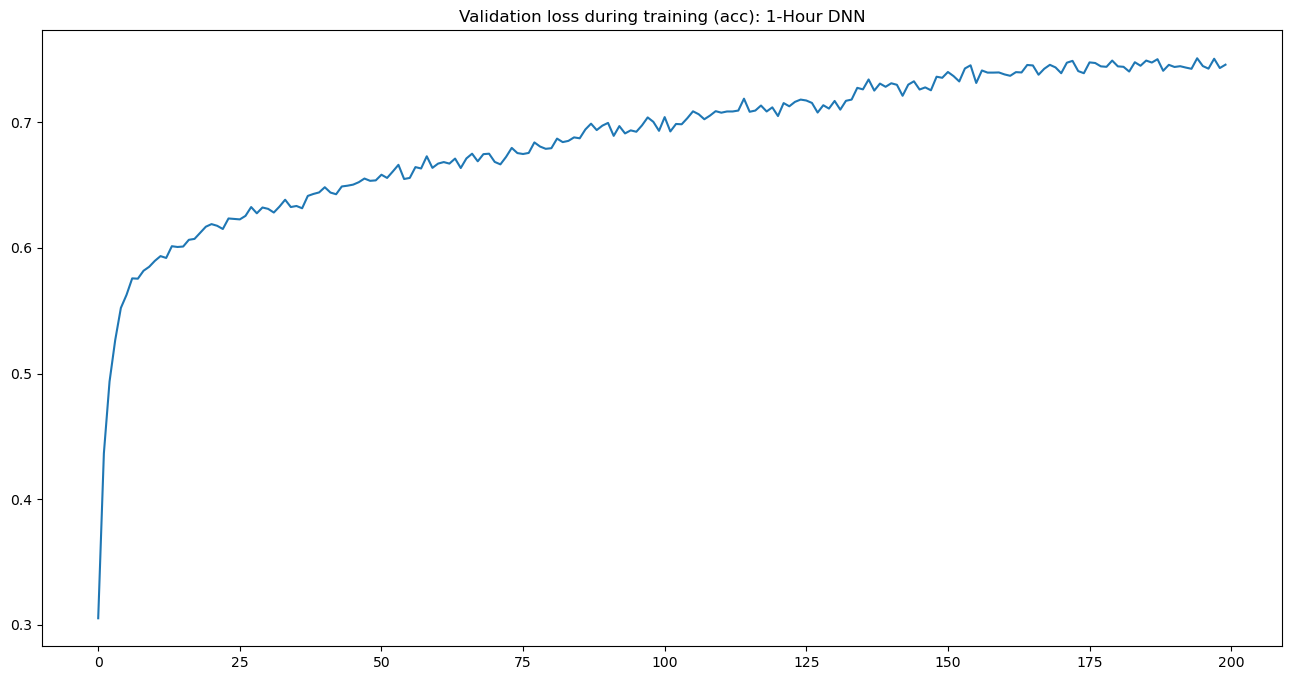

In [542]:
plt.figure(figsize=(16,8))
plt.plot(history.history['accuracy'])
plt.title('Validation loss during training (acc): 1-Hour DNN')
plt.show()

In [543]:
y_pred_dnn = model3.predict(X_test5)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step


In [544]:
y_pred_dnn

array([[0.84782505, 0.00446469, 0.0430673 , 0.10294715, 0.0016958 ],
       [0.07163064, 0.45670408, 0.22273923, 0.24031238, 0.00861369],
       [0.49884266, 0.02679808, 0.2786062 , 0.05296079, 0.14279227],
       ...,
       [0.01575078, 0.2733542 , 0.6626577 , 0.02199261, 0.02624479],
       [0.21954791, 0.00483603, 0.04204144, 0.00876431, 0.72481024],
       [0.50042367, 0.28616202, 0.10474227, 0.02446572, 0.08420629]],
      dtype=float32)

In [545]:
y_pred_classes = y_pred_dnn.argmax(axis=1)

In [546]:
max(y_pred_classes)

4

In [547]:
print(confusion_matrix(Y_test5, y_pred_classes))
print(classification_report(Y_test5, y_pred_classes))
print(matthews_corrcoef(Y_test5, y_pred_classes))

[[449  49  31  32  46]
 [ 13  74  25   1  13]
 [ 27  43  69  22  15]
 [ 27  11  19  40   3]
 [ 17  11   7   7  11]]
              precision    recall  f1-score   support

         0.0       0.84      0.74      0.79       607
         1.0       0.39      0.59      0.47       126
         2.0       0.46      0.39      0.42       176
         3.0       0.39      0.40      0.40       100
         4.0       0.12      0.21      0.16        53

    accuracy                           0.61      1062
   macro avg       0.44      0.47      0.45      1062
weighted avg       0.65      0.61      0.62      1062

0.40147459869650515


In [548]:


macro_roc_auc_ovo = roc_auc_score(Y_test5, y_pred_dnn, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    Y_test5, y_pred_dnn, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(Y_test5, y_pred_dnn, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    Y_test5, y_pred_dnn, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.776940 (macro),
0.802016 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.796704 (macro),
0.838863 (weighted by prevalence)


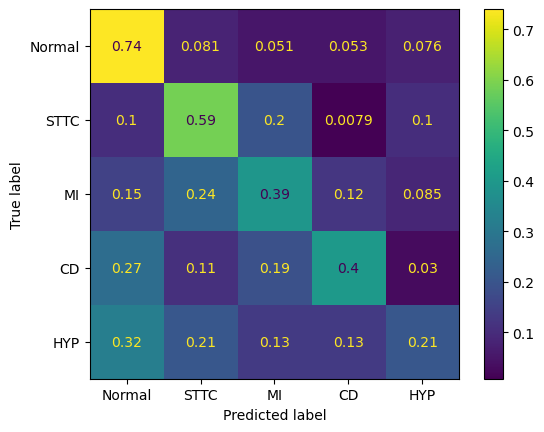

In [549]:
confusion_matrix2 = metrics.confusion_matrix(Y_test5, y_pred_classes, normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = ['Normal', 'STTC','MI','CD','HYP'])
cm_display.plot()
plt.show() 